## **Key Determinates of Wealth Distrubtion in the United States**

Madelyn Nolder

#Import Packages and Read Data

In [65]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [66]:
#import packages
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from pydotplus import graph_from_dot_data
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from random import choice
from scipy.stats import ttest_ind
from sklearn.model_selection import KFold 

In [67]:
#this is necessary for reading files from Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
#Survey of Consumer Finances Data 
#read in the csv data 

#Table 4: Family net worth, by selected characteristics of families, 1989–2019 surveys
T4 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/Table4.csv')

#Table 5: Value of financial assets of all families, distributed by type of asset, 1989–2019 surveys
T5 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/Table5.x.csv')

import pandas as pd

In [69]:
#Household_data = pd.read_csv("/content/drive/MyDrive/Capstone Project/Code/Copy_of_numofAmerican2_HH_byyear_US_Census_Beuro.csv")

In [70]:
#Read in data for machine learning application 
SCF_data_2019 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/SCF_RawCSVData.csv')

#SCF_data_2016
SCF_data_2016 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/SCF_data_2016.csv')

#SCF_data_2013
SCF_data_2013 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/SCF_data_2013.csv')

#SCF_data_2010
SCF_data_2010 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/SCF_data_2010.csv')

#SCF_data_2007
SCF_data_2007 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/SCF_data_2007.csv')

#SCF_data_2004
SCF_data_2004 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/SCF_data_2004.csv')

#SCF_data_2001
SCF_data_2001 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/SCF_data_2001.csv')

#SCF_data_1998
SCF_data_1998 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/SCF_data_1998.csv')

#SCF_data_1995
SCF_data_1995 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/SCF_data_1995.csv')


In [71]:
#Reading in OECD Data 
#OECD Panel 
OECD_Panel = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/Panel_OECD.csv')
OECD_Panel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COUNTRY     547 non-null    object 
 1   Country     547 non-null    object 
 2   VAR         547 non-null    object 
 3   Variable    547 non-null    object 
 4   POPULATION  547 non-null    object 
 5   Population  547 non-null    object 
 6   TIME        547 non-null    int64  
 7   Time        547 non-null    int64  
 8   Value       547 non-null    float64
 9   Flag Codes  10 non-null     object 
 10  Flags       10 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 47.1+ KB


#SCF Data Analysis

##Exploratory Data Analysis 

###Graphics of Wealth Distribution

####Average American NW by Percentile

In [72]:
#want to create interactive chart that shows timeline of wealth distribution for each quartile 
#this will shows changes in spread over time 
#x="Year", y="Avergae NetWorth in 2019 Dollars", title="Average Networth by Percentile from 1995-2019 SCF Reports"

 #Means of Networth for families in different percentiles (2019$)
 #data from scf table 4

import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(
    x=["1995", "1998", "2001", "2004", "2007",
       "2010","2013", "2016", "2019"],
    y=["-300", "-2900", "100", "-1800", "-2600", 
       "-14300", "-14200", "-12700", "-13600"],
    name="< 25 Percentile of Networth",
    text=["-$300", "-$2,900", "$100", "-$1,800", "-$2600", 
       "-$14,300", "-$14,200", "-$12,700", "-$13,600"],
    yaxis="y",
))

fig.add_trace(go.Scatter(
    x=["1995", "1998", "2001", "2004", "2007",
       "2010","2013", "2016", "2019"],
    y=["$51,100","$56,600","$64,200","$63,900","$71,800",
       "$42,000","$39,400","$47,500","$58,200"],
    name="25-49.9 Percentile of Networth",
    text=["$51,100","$56,600","$64,200","$63,900","$71,800",
       "$42,000","$39,400","$47,500","$58,200"],
    yaxis="y",
))

fig.add_trace(go.Scatter(
    x=["1995", "1998", "2001", "2004", "2007",
       "2010","2013", "2016", "2019"],
    y=["$166,300", "$202,400", "$241800", "$252,000", "$281,100", 
       "$198,100", "$195,200", "$217,000", "$236,300"],
    name="50-74.9 Percentile of Networth",
    text=["$166,300", "$202,400", "$241800", "$252,000", "$281,100", 
       "$198,100", "$195,200", "$217,000", "$236,300"],
    yaxis="y",
))

fig.add_trace(go.Scatter(
    x=["1995", "1998", "2001", "2004", "2007",
       "2010","2013", "2016", "2019"],
    y=["$398,500", "$507,500", "$653,300", "$717,000", "$725,900", 
       "$618,600", "$599,900", "$701,100", "$703,600"],
    name="75-89.9 Percentile of Networth",
    text=["$398,500", "$507,500", "$653,300", "$717,000", "$725,900", 
       "$618,600", "$599,900", "$701,100", "$703,600"],
    yaxis="y",
))

fig.add_trace(go.Scatter(
    x=["1995", "1998", "2001", "2004", "2007",
       "2010","2013", "2016", "2019"],
    y=["$2,416,200", "$3,058,200", "$3,994,000", "$4,228,000", "$4,906,700", 
       "$4,338,200", "$4,351,400", "$5,648,500", "$5,710,300"],
    name="90-100 Percentile of Networth",
    text=["$2,416,200", "$3,058,200", "$3,994,000", "$4,228,000", "$4,906,700", 
       "$4,338,200", "$4,351,400", "$5,648,500", "$5,710,300"],
    yaxis="y",
))

# style all the traces
fig.update_traces(
    hoverinfo="name+x+text",
    line={"width": 1},
    marker={"size": 8},
    mode="lines+markers",
    showlegend=True
)

# Add shapes
fig.update_layout(
    title_text = "Average American Networth by Percentile from 1995-2019 SCF Reports",
    title_font_size = 30,
    xaxis_title="Year of SCF Report",
    yaxis_title="Average Networth(2019 $)",
    title_x=0.5
)
#1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019
# Update axes
fig.update_layout(
    xaxis=dict(
        autorange=True,
        range=[1995,2019],
        rangeslider=dict(
            autorange=True,
            range=[1995,2019]
        ),
        type="date"
    ),
    yaxis=dict(
        anchor="x",
        autorange=True,
        domain=[0, 1],
        linecolor="#673ab7",
        mirror=True,
        range=[-1000000,8000000],
        showline=True,
        side="right",
        tickfont={"color": "#673ab7"},
        tickmode="auto",
        ticks="",
        titlefont={"color": "#673ab7"},
        type="linear",
        zeroline=False
    )
)

# Update layout
fig.update_layout(
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=650,
    template="plotly_white",
    margin=dict(
        t=75,
        b=75
    ),
)

fig.show()

####Percentage of Total Wealth held by each Percentile 

In [73]:
#Need to create the following dataframe 
#total net wealth by year (calculated by multiplying average netwealth by (percentile weight*year household tot)

data = [[1995,"<25",.25,-300,98990000],[1995,"25-49.9",.25,51100,98990000],[1995,"50-74.9",.25,166300,98990000],[1995,"75-89.9",.15,398500,98990000],[1995,"90-100",.10,2416200,98990000],
        [1998,"<25",.25,-2900,102528000],[1998,"25-49.9",.25,56600,102528000],[1998,"50-74.9",.25,202400,102528000],[1998,"75-89.9",.15,507500,102528000],[1998,"90-100",.10,3058200,102528000],
        [2001,"<25",.25,100,108209000],[2001,"25-49.9",.25,64200,108209000],[2001,"50-74.9",.25,241800,108209000],[2001,"75-89.9",.15,653300,108209000],[2001,"90-100",.10,3994200,108209000],
        [2004,"<25",.25,-1800,112000000],[2004,"25-49.9",.25,63900,112000000],[2004,"50-74.9",.25,252000,112000000],[2004,"75-89.9",.15,717000,112000000],[2004,"90-100",.10,4228000,112000000],
        [2007,"<25",.25,-2600,116011000],[2007,"25-49.9",.25,71800,116011000],[2007,"50-74.9",.25,281100,116011000],[2007,"75-89.9",.15,725900,116011000],[2007,"90-100",.10,4906700,116011000],
        [2010,"<25",.25,-14300,117538000],[2010,"25-49.9",.25,42000,117538000],[2010,"50-74.9",.25,198100,117538000],[2010,"75-89.9",.15,618600,117538000],[2010,"90-100",.10,4338200,117538000],
        [2013,"<25",.25,-14200,122459000],[2013,"25-49.9",.25,39400,122459000],[2013,"50-74.9",.25,195200,122459000],[2013,"75-89.9",.15,599900,122459000],[2013,"90-100",.10,4351400,122459000],
        [2016,"<25",.25,-12700,125819000],[2016,"25-49.9",.25,47500,125819000],[2016,"50-74.9",.25,217000,125819000],[2016,"75-89.9",.15,701100,125819000],[2016,"90-100",.10,5658500,125819000],
        [2019,"<25",.25,-13600,128579000],[2019,"25-49.9",.25,58200,128579000],[2019,"50-74.9",.25,236300,128579000],[2019,"75-89.9",.15,703600,128579000],[2019,"90-100",.10,5710300,128579000]]

df_NW_pop = pd.DataFrame(data, columns=["Year","Percentile","Percentile Weight","Average Networth","Tot_HH"])
df_NW_pop['Percentile Tot NW'] = df_NW_pop['Percentile Weight']*df_NW_pop['Tot_HH']*df_NW_pop['Average Networth']
#df_NW_pop

#then break out into yearly dataframes and do total year 
df_NW_pop_1995 = df_NW_pop[df_NW_pop['Year' ]== 1995]
df_NW_pop_1995['Yearly Total NW'] = df_NW_pop_1995['Percentile Tot NW'].sum()
df_NW_pop_1995['percent_of_tot'] = 100*(df_NW_pop_1995['Percentile Tot NW']/df_NW_pop_1995['Yearly Total NW'])


df_NW_pop_1998 = df_NW_pop[df_NW_pop['Year' ]== 1998]
df_NW_pop_1998['Yearly Total NW'] = df_NW_pop_1998['Percentile Tot NW'].sum()
df_NW_pop_1998['percent_of_tot'] = 100*(df_NW_pop_1998['Percentile Tot NW']/df_NW_pop_1998['Yearly Total NW'])

df_NW_pop_2001 = df_NW_pop[df_NW_pop['Year' ]== 2001]
df_NW_pop_2001['Yearly Total NW'] = df_NW_pop_2001['Percentile Tot NW'].sum()
df_NW_pop_2001['percent_of_tot'] = 100*(df_NW_pop_2001['Percentile Tot NW']/df_NW_pop_2001['Yearly Total NW'])

df_NW_pop_2004 = df_NW_pop[df_NW_pop['Year' ]== 2004]
df_NW_pop_2004['Yearly Total NW'] = df_NW_pop_2004['Percentile Tot NW'].sum()
df_NW_pop_2004['percent_of_tot'] = 100*(df_NW_pop_2004['Percentile Tot NW']/df_NW_pop_2004['Yearly Total NW'])

df_NW_pop_2007 = df_NW_pop[df_NW_pop['Year' ]== 2007]
df_NW_pop_2007['Yearly Total NW'] = df_NW_pop_2007['Percentile Tot NW'].sum()
df_NW_pop_2007['percent_of_tot'] = 100*(df_NW_pop_2007['Percentile Tot NW']/df_NW_pop_2007['Yearly Total NW'])

df_NW_pop_2010 = df_NW_pop[df_NW_pop['Year' ]== 2010]
df_NW_pop_2010['Yearly Total NW'] = df_NW_pop_2010['Percentile Tot NW'].sum()
df_NW_pop_2010['percent_of_tot'] = 100*(df_NW_pop_2010['Percentile Tot NW']/df_NW_pop_2010['Yearly Total NW'])

df_NW_pop_2013 = df_NW_pop[df_NW_pop['Year' ]== 2013]
df_NW_pop_2013['Yearly Total NW'] = df_NW_pop_2013['Percentile Tot NW'].sum()
df_NW_pop_2013['percent_of_tot'] = 100*(df_NW_pop_2013['Percentile Tot NW']/df_NW_pop_2013['Yearly Total NW'])

df_NW_pop_2016 = df_NW_pop[df_NW_pop['Year' ]== 2016]
df_NW_pop_2016['Yearly Total NW'] = df_NW_pop_2016['Percentile Tot NW'].sum()
df_NW_pop_2016['percent_of_tot'] = 100*(df_NW_pop_2016['Percentile Tot NW']/df_NW_pop_2016['Yearly Total NW'])

df_NW_pop_2019 = df_NW_pop[df_NW_pop['Year' ]== 2019]
df_NW_pop_2019['Yearly Total NW'] = df_NW_pop_2019['Percentile Tot NW'].sum()
df_NW_pop_2019['percent_of_tot'] = 100*(df_NW_pop_2019['Percentile Tot NW']/df_NW_pop_2019['Yearly Total NW'])
df_NW_pop_1995

<ipython-input-73-ad58fffa0b7e>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-ad58fffa0b7e>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-ad58fffa0b7e>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-ad58

Year Percentile  Percentile Weight  Average Networth    Tot_HH  \
0  1995        <25               0.25              -300  98990000   
1  1995    25-49.9               0.25             51100  98990000   
2  1995    50-74.9               0.25            166300  98990000   
3  1995    75-89.9               0.15            398500  98990000   
4  1995     90-100               0.10           2416200  98990000   

   Percentile Tot NW  Yearly Total NW  percent_of_tot  
0      -7.424250e+09     3.520777e+13       -0.021087  
1       1.264597e+12     3.520777e+13        3.591813  
2       4.115509e+12     3.520777e+13       11.689206  
3       5.917127e+12     3.520777e+13       16.806309  
4       2.391796e+13     3.520777e+13       67.933759

In [74]:
#combine all dataframes 
frames = [df_NW_pop_1995, df_NW_pop_1998,df_NW_pop_2001,df_NW_pop_2004,df_NW_pop_2007,
          df_NW_pop_2010,df_NW_pop_2013,df_NW_pop_2016,df_NW_pop_2019]
  
result_NW_pop = pd.concat(frames)
result_NW_pop

Year Percentile  Percentile Weight  Average Networth     Tot_HH  \
0   1995        <25               0.25              -300   98990000   
1   1995    25-49.9               0.25             51100   98990000   
2   1995    50-74.9               0.25            166300   98990000   
3   1995    75-89.9               0.15            398500   98990000   
4   1995     90-100               0.10           2416200   98990000   
5   1998        <25               0.25             -2900  102528000   
6   1998    25-49.9               0.25             56600  102528000   
7   1998    50-74.9               0.25            202400  102528000   
8   1998    75-89.9               0.15            507500  102528000   
9   1998     90-100               0.10           3058200  102528000   
10  2001        <25               0.25               100  108209000   
11  2001    25-49.9               0.25             64200  108209000   
12  2001    50-74.9               0.25            241800  108209000   
13  2001    75-89.9               0.15            653300  108209000   
14  2001     90-100               0.10           3994200  108209000   
15  2004        <25               0.25             -1800  112000000   
16  2004    25-49.9               0.25             63900  112000000   
17  2004    50-74.9               0.25            252000  112000000   
18  2004    75-89.9               0.15            717000  112000000   
19  2004     90-100               0.10           4228000  112000000   
20  2007        <25               0.25             -2600  116011000   
21  2007    25-49.9               0.25             71800  116011000   
22  2007    50-74.9               0.25            281100  116011000   
23  2007    75-89.9               0.15            725900  116011000   
24  2007     90-100               0.10           4906700  116011000   
25  2010        <25               0.25            -14300  117538000   
26  2010    25-49.9               0.25             42000  117538000   
27  2010    50-74.9               0.25            198100  117538000   
28  2010    75-89.9               0.15            618600  117538000   
29  2010     90-100               0.10           4338200  117538000   
30  2013        <25               0.25            -14200  122459000   
31  2013    25-49.9               0.25             39400  122459000   
32  2013    50-74.9               0.25            195200  122459000   
33  2013    75-89.9               0.15            599900  122459000   
34  2013     90-100               0.10           4351400  122459000   
35  2016        <25               0.25            -12700  125819000   
36  2016    25-49.9               0.25             47500  125819000   
37  2016    50-74.9               0.25            217000  125819000   
38  2016    75-89.9               0.15            701100  125819000   
39  2016     90-100               0.10           5658500  125819000   
40  2019        <25               0.25            -13600  128579000   
41  2019    25-49.9               0.25             58200  128579000   
42  2019    50-74.9               0.25            236300  128579000   
43  2019    75-89.9               0.15            703600  128579000   
44  2019     90-100               0.10           5710300  128579000   

    Percentile Tot NW  Yearly Total NW  percent_of_tot  
0       -7.424250e+09     3.520777e+13       -0.021087  
1        1.264597e+12     3.520777e+13        3.591813  
2        4.115509e+12     3.520777e+13       11.689206  
3        5.917127e+12     3.520777e+13       16.806309  
4        2.391796e+13     3.520777e+13       67.933759  
5       -7.433280e+10     4.572441e+13       -0.162567  
6        1.450771e+12     4.572441e+13        3.172859  
7        5.187917e+12     4.572441e+13       11.346055  
8        7.804944e+12     4.572441e+13       17.069534  
9        3.135511e+13     4.572441e+13       68.574119  
10       2.705225e+09     6.210547e+13        0.004356  
11       1.736754e+12     6.210547e+13        2.79646

In [75]:
#make pivot dataframe 
pivot_NW_pop = pd.pivot_table(data=result_NW_pop, index=['Year'], columns=['Percentile'], values='percent_of_tot')
pivot_NW_pop

Percentile   25-49.9    50-74.9    75-89.9     90-100       <25
Year                                                           
1995        3.591813  11.689206  16.806309  67.933759 -0.021087
1998        3.172859  11.346055  17.069534  68.574119 -0.162567
2001        2.796460  10.532460  17.074084  69.592640  0.004356
2004        2.623691  10.346951  17.663724  69.439540 -0.073907
2007        2.612315  10.227322  15.846346  71.408613 -0.094596
2010        1.800844   8.493980  15.914314  74.404006 -0.613144
2013        1.697617   8.410530  15.508639  74.995045 -0.611832
2016        1.617925   7.391361  14.328340  77.094957 -0.432582
2019        1.948326   7.910471  14.132392  76.464090 -0.455279

In [76]:
ax = pivot_NW_pop.plot.bar(stacked=True, figsize=(8,6))
ax.set_title('% of Total Wealth Held by Each Percentile', fontsize=20)
ax.set_ylim(0,105)
ax.set_xticklabels(["1995", "1998", "2001", "2004", "2007",
       "2010","2013", "2016", "2019"], rotation=0)

[Text(0, 0, '1995'),
 Text(0, 0, '1998'),
 Text(0, 0, '2001'),
 Text(0, 0, '2004'),
 Text(0, 0, '2007'),
 Text(0, 0, '2010'),
 Text(0, 0, '2013'),
 Text(0, 0, '2016'),
 Text(0, 0, '2019')]

##SCF Machine Learning

In [77]:
SCF_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28885 entries, 0 to 28884
Columns: 351 entries, YY1 to NINC QRT CAT
dtypes: float64(74), int64(277)
memory usage: 77.4 MB


In [78]:
SCF_data_2019.describe()

YY1            Y1           WGT         HHSEX           AGE  \
count  28885.000000  28885.000000  28885.000000  28885.000000  28885.000000   
mean    2906.446945  29067.469448   4453.606750      1.223819     53.219837   
std     1678.234066  16782.340720   2815.046077      0.416809     16.243653   
min        1.000000     11.000000      1.442477      1.000000     18.000000   
25%     1452.000000  14522.000000   2098.599956      1.000000     40.000000   
50%     2906.000000  29063.000000   4761.795033      1.000000     54.000000   
75%     4359.000000  43594.000000   6179.113347      1.000000     65.000000   
max     5813.000000  58135.000000  14827.320640      2.000000     95.000000   

              AGECL          EDUC          EDCL       MARRIED          KIDS  \
count  28885.000000  28885.000000  28885.000000  28885.000000  28885.000000   
mean       3.388783     10.247395      3.073394      1.375974      0.748312   
std        1.546648      2.700152      1.008865      0.484382      1.123829   
min        1.000000     -1.000000      1.000000      1.000000      0.000000   
25%        2.000000      8.000000      2.000000      1.000000      0.000000   
50%        3.000000     11.000000      3.000000      1.000000      0.000000   
75%        5.000000     12.000000      4.000000      2.000000      1.000000   
max        6.000000     14.000000      4.000000      2.000000      7.000000   

       ...        NW CAT       INC CAT     ASSET CAT      NINC CAT  \
count  ...  28885.000000  28885.000000  28885.000000  28885.000000   
mean   ...      3.075022      3.654146      3.666713      3.666332   
std    ...      1.509840      1.806267      1.858337      1.800673   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...      2.000000      2.000000      2.000000      2.000000   
50%    ...      3.000000      4.000000      4.000000      4.000000   
75%    ...      5.000000      6.000000      6.000000      6.000000   
max    ...      5.000000      6.000000      6.000000      6.000000   

         NINC 2 CAT  NW PCTLE CAT  INC PCTLE CAT  NINC PCTLE CAT  \
count  28885.000000  28885.000000   28885.000000    28885.000000   
mean       1.864532      6.717050       6.683157        6.713969   
std        0.794989      3.612269       3.532322        3.525801   
min        1.000000      1.000000       1.000000        1.000000   
25%        1.000000      3.000000       4.000000        4.000000   
50%        2.000000      7.000000       7.000000        7.000000   
75%        3.000000     10.000000      10.000000       10.000000   
max        3.000000     12.000000      12.000000       12.000000   

        INC QRT CAT  NINC QRT CAT  
count  28885.000000  28885.000000  
mean       2.798823      2.809244  
std        1.168914      1.164626  
min        1.000000      1.000000  
25%        2.000000      2.000000  
50%        3.000000      3.000000  
75%        4.000000      4.000000  
max        4.000000      4.000000  

[8 rows x 351 columns]

###Organizing the SCF Data for Analysis

In [79]:
#scf dataframes we want to clean/ combine 
dataframes = [SCF_data_2019, SCF_data_2016, SCF_data_2013, SCF_data_2010, SCF_data_2007, SCF_data_2004, SCF_data_2001, SCF_data_1998, SCF_data_1995] 

#add year column 
SCF_data_2019["YEAR_INDEX"] = 2019 
SCF_data_2016["YEAR_INDEX"] = 2016 
SCF_data_2013["YEAR_INDEX"] = 2013
SCF_data_2010["YEAR_INDEX"] = 2010
SCF_data_2007["YEAR_INDEX"] = 2007 
SCF_data_2004["YEAR_INDEX"] = 2004
SCF_data_2001["YEAR_INDEX"] = 2001
SCF_data_1998["YEAR_INDEX"] = 1998
SCF_data_1995["YEAR_INDEX"] = 1995

#dropping all null values 
SCF_2019_dropna = SCF_data_2019.dropna() 
SCF_2016_dropna = SCF_data_2016.dropna()
SCF_2013_dropna = SCF_data_2013.dropna() 
SCF_2010_dropna = SCF_data_2010.dropna()
SCF_2007_dropna = SCF_data_2007.dropna() 
SCF_2004_dropna = SCF_data_2004.dropna()
SCF_2001_dropna = SCF_data_2001.dropna() 
SCF_1998_dropna = SCF_data_1998.dropna()
SCF_1995_dropna = SCF_data_1995.dropna()

#extracting only desired columns 

columns = ["YY1","HHSEX", "AGE", "AGECL", "EDUC", "EDCL", "MARRIED", "KIDS", "FAMSTRUCT", "RACECL",
           "RACECL4", "RACE", "OCCAT1", "OCCAT2", "FOODHOME", "FOODAWAY", "FOODDELV", "RENT", "INCOME", "WAGEINC", 
           "SAVED", "SPENDMORE", "SPENDLESS", "EMERGSAV", "CHECKING", "SAVING", "STOCKS", "HSTOCKS", "NSTOCKS", 
           "NOTXBND", "MORTBND", "GOVBND", "OBND", "BOND", "HBOND", "SAVBND", "HSAVBND", "CASHLI", "HCASHLI", "TRUSTS", 
           "EQUITY", "HEQUITY", "HFIN", "VEHIC", "HVEHIC", "BUSVEH", "NBUSVEH", "HOUSES", "HHOUSES",
           "HASSET", "RESDBT", "HRESDBT", "DEBT", "HDEBT", "LEVRATIO", "DEBT2INC", "NWCAT", "INCCAT", "NINCCAT", 
           "NINC2CAT", "NINCPCTLECAT", "INCQRTCAT", "NINCQRTCAT","YEAR_INDEX"]

SCF_2019_features = SCF_2019_dropna[SCF_2019_dropna.columns.intersection(columns)]
SCF_2016_features = SCF_2016_dropna[SCF_2016_dropna.columns.intersection(columns)]
SCF_2013_features = SCF_2013_dropna[SCF_2013_dropna.columns.intersection(columns)]
SCF_2010_features = SCF_2010_dropna[SCF_2010_dropna.columns.intersection(columns)]
SCF_2007_features = SCF_2007_dropna[SCF_2007_dropna.columns.intersection(columns)]
SCF_2004_features = SCF_2004_dropna[SCF_2004_dropna.columns.intersection(columns)]
SCF_2001_features = SCF_2001_dropna[SCF_2001_dropna.columns.intersection(columns)]
SCF_1998_features = SCF_1998_dropna[ SCF_1998_dropna.columns.intersection(columns)]
SCF_1995_features = SCF_1995_dropna[SCF_1995_dropna.columns.intersection(columns)]

#be cautious in their treatment of the implicates. Some regression packages will treat each of the five 
#implicates as an independent observation and correspondingly inflate the reported statistical significance of results. 

#Users who want to calculate regression estimates, but who have no immediate use for proper significance
#tests, could either average the dependent and independent values across the implicates or multiply their 
#standard errors by the square root of five. 

#take the mean of all values with the same YY1 
SCF_2019_averaged = SCF_2019_features.groupby('YY1').transform("mean")
SCF_2016_averaged = SCF_2016_features.groupby('YY1').transform("mean")
SCF_2013_averaged = SCF_2013_features.groupby('YY1').transform("mean")
SCF_2010_averaged = SCF_2010_features.groupby('YY1').transform("mean")
SCF_2007_averaged = SCF_2007_features.groupby('YY1').transform("mean")
SCF_2004_averaged = SCF_2004_features.groupby('YY1').transform("mean")
SCF_2001_averaged = SCF_2001_features.groupby('YY1').transform("mean")
SCF_1998_averaged = SCF_1998_features.groupby('YY1').transform("mean")
SCF_1995_averaged = SCF_1995_features.groupby('YY1').transform("mean")


#combining all dataframes 
combined_data = pd.concat([SCF_2019_averaged,SCF_2016_averaged,SCF_2013_averaged,SCF_2010_averaged,SCF_2007_averaged,
       SCF_2004_averaged,SCF_2001_averaged,SCF_1998_averaged,SCF_1995_averaged], axis=0)
combined_data.describe()

HHSEX            AGE         AGECL           EDUC  \
count  232510.00000  232510.000000  232510.00000  232510.000000   
mean        1.22270      51.316326       3.19880       9.843022   
std         0.41606      16.203373       1.53939       2.925286   
min         1.00000      17.000000       1.00000      -1.000000   
25%         1.00000      39.000000       2.00000       8.000000   
50%         1.00000      51.000000       3.00000       9.000000   
75%         1.00000      63.000000       4.00000      12.000000   
max         2.00000      95.000000       6.00000      14.000000   

                EDCL        MARRIED           KIDS      FAMSTRUCT  \
count  232510.000000  232510.000000  232510.000000  232510.000000   
mean        2.955008       1.354995       0.828545       3.631809   
std         1.041835       0.478513       1.167163       1.312020   
min         1.000000       1.000000       0.000000       1.000000   
25%         2.000000       1.000000       0.000000       3.000000   
50%         3.000000       1.000000       0.000000       4.000000   
75%         4.000000       2.000000       2.000000       5.000000   
max         4.000000       2.000000      10.000000       5.000000   

              RACECL        RACECL4  ...       LEVRATIO       DEBT2INC  \
count  232510.000000  232510.000000  ...  232510.000000  232510.000000   
mean        1.257030       1.484719  ...      10.767652       1.334111   
std         0.436371       0.924976  ...     643.046973       9.420448   
min         1.000000       1.000000  ...       0.000000       0.000000   
25%         1.000000       1.000000  ...       0.000000       0.000000   
50%         1.000000       1.000000  ...       0.109507       0.390590   
75%         2.000000       2.000000  ...       0.450336       1.494679   
max         2.000000       4.000000  ...   78000.000000     910.404537   

          YEAR_INDEX          NWCAT         INCCAT        NINCCAT  \
count  232510.000000  203630.000000  203630.000000  203630.000000   
mean     2008.086663       3.102799       3.689555       3.712375   
std         7.656610       1.510728       1.798278       1.792342   
min      1995.000000       1.000000       1.000000       1.000000   
25%      2001.000000       2.000000       2.000000       2.000000   
50%      2010.000000       3.000000       4.000000       4.000000   
75%      2016.000000       5.000000       6.000000       6.000000   
max      2019.000000       5.000000       6.000000       6.000000   

            NINC2CAT   NINCPCTLECAT      INCQRTCAT     NINCQRTCAT  
count  203630.000000  203630.000000  203630.000000  203630.000000  
mean        1.885601       6.811894       2.817625       2.832407  
std         0.795863       3.521636       1.154600       1.148407  
min         1.000000       1.000000       1.000000       1.000000  
25%         1.000000       4.000000       2.000000       2.000000  
50%         2.000000       7.000000       3.000000       3.000000  
75%         3.000000      10.000000       4.000000       4.000000  
max         3.000000      12.000000       4.000000       4.000000  

[8 rows x 61 columns]

In [80]:
len(columns)

64

In [81]:
combined_data.describe()

HHSEX            AGE         AGECL           EDUC  \
count  232510.00000  232510.000000  232510.00000  232510.000000   
mean        1.22270      51.316326       3.19880       9.843022   
std         0.41606      16.203373       1.53939       2.925286   
min         1.00000      17.000000       1.00000      -1.000000   
25%         1.00000      39.000000       2.00000       8.000000   
50%         1.00000      51.000000       3.00000       9.000000   
75%         1.00000      63.000000       4.00000      12.000000   
max         2.00000      95.000000       6.00000      14.000000   

                EDCL        MARRIED           KIDS      FAMSTRUCT  \
count  232510.000000  232510.000000  232510.000000  232510.000000   
mean        2.955008       1.354995       0.828545       3.631809   
std         1.041835       0.478513       1.167163       1.312020   
min         1.000000       1.000000       0.000000       1.000000   
25%         2.000000       1.000000       0.000000       3.000000   
50%         3.000000       1.000000       0.000000       4.000000   
75%         4.000000       2.000000       2.000000       5.000000   
max         4.000000       2.000000      10.000000       5.000000   

              RACECL        RACECL4  ...       LEVRATIO       DEBT2INC  \
count  232510.000000  232510.000000  ...  232510.000000  232510.000000   
mean        1.257030       1.484719  ...      10.767652       1.334111   
std         0.436371       0.924976  ...     643.046973       9.420448   
min         1.000000       1.000000  ...       0.000000       0.000000   
25%         1.000000       1.000000  ...       0.000000       0.000000   
50%         1.000000       1.000000  ...       0.109507       0.390590   
75%         2.000000       2.000000  ...       0.450336       1.494679   
max         2.000000       4.000000  ...   78000.000000     910.404537   

          YEAR_INDEX          NWCAT         INCCAT        NINCCAT  \
count  232510.000000  203630.000000  203630.000000  203630.000000   
mean     2008.086663       3.102799       3.689555       3.712375   
std         7.656610       1.510728       1.798278       1.792342   
min      1995.000000       1.000000       1.000000       1.000000   
25%      2001.000000       2.000000       2.000000       2.000000   
50%      2010.000000       3.000000       4.000000       4.000000   
75%      2016.000000       5.000000       6.000000       6.000000   
max      2019.000000       5.000000       6.000000       6.000000   

            NINC2CAT   NINCPCTLECAT      INCQRTCAT     NINCQRTCAT  
count  203630.000000  203630.000000  203630.000000  203630.000000  
mean        1.885601       6.811894       2.817625       2.832407  
std         0.795863       3.521636       1.154600       1.148407  
min         1.000000       1.000000       1.000000       1.000000  
25%         1.000000       4.000000       2.000000       2.000000  
50%         2.000000       7.000000       3.000000       3.000000  
75%         3.000000      10.000000       4.000000       4.000000  
max         3.000000      12.000000       4.000000       4.000000  

[8 rows x 61 columns]

In [82]:
#dropping all null values 
combined_data2 = combined_data.dropna()
combined_data2.describe()

HHSEX           AGE         AGECL          EDUC          EDCL  \
count  93720.000000  93720.000000  93720.000000  93720.000000  93720.000000   
mean       1.233355     51.702518      3.232661      9.857725      2.956562   
std        0.422968     16.105998      1.531586      2.848312      1.028288   
min        1.000000     18.000000      1.000000     -1.000000      1.000000   
25%        1.000000     39.000000      2.000000      8.000000      2.000000   
50%        1.000000     52.000000      3.000000      9.000000      3.000000   
75%        1.000000     63.000000      4.000000     12.000000      4.000000   
max        2.000000     95.000000      6.000000     14.000000      4.000000   

            MARRIED          KIDS     FAMSTRUCT        RACECL       RACECL4  \
count  93720.000000  93720.000000  93720.000000  93720.000000  93720.000000   
mean       1.373453      0.838988      3.582533      1.299829      1.580143   
std        0.483723      1.178263      1.324340      0.457547      0.997086   
min        1.000000      0.000000      1.000000      1.000000      1.000000   
25%        1.000000      0.000000      3.000000      1.000000      1.000000   
50%        1.000000      0.000000      4.000000      1.000000      1.000000   
75%        2.000000      2.000000      5.000000      2.000000      2.000000   
max        2.000000     10.000000      5.000000      2.000000      4.000000   

       ...      LEVRATIO      DEBT2INC    YEAR_INDEX         NWCAT  \
count  ...  93720.000000  93720.000000  93720.000000  93720.000000   
mean   ...     11.945681      1.417227   2012.962548      2.980783   
std    ...    567.654854      8.469484      2.472047      1.480103   
min    ...      0.000000      0.000000   2010.000000      1.000000   
25%    ...      0.000000      0.000000   2010.000000      2.000000   
50%    ...      0.128778      0.411247   2013.000000      3.000000   
75%    ...      0.522994      1.641729   2016.000000      4.000000   
max    ...  65000.000000    695.666132   2016.000000      5.000000   

             INCCAT       NINCCAT      NINC2CAT  NINCPCTLECAT     INCQRTCAT  \
count  93720.000000  93720.000000  93720.000000  93720.000000  93720.000000   
mean       3.546842      3.578404      1.823389      6.537068      2.739181   
std        1.773587      1.769509      0.778423      3.455841      1.159907   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      2.000000      1.000000      3.800000      2.000000   
50%        3.400000      3.600000      2.000000      6.600000      3.000000   
75%        5.000000      5.000000      2.000000      9.000000      4.000000   
max        6.000000      6.000000      3.000000     12.000000      4.000000   

         NINCQRTCAT  
count  93720.000000  
mean       2.760649  
std        1.153385  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        4.000000  

[8 rows x 61 columns]

####Train-Test Split

In [83]:
#other necessary packages 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel 

#converting all data to integers
combined_data2 = combined_data2.astype('int64')
#SCF_2019_averaged = SCF_2019_averaged.astype('int64')

In [84]:
#want to run the model with all variables first and then use cross validation and 
#other feature selection methods to reduce dimensionality
all_var = combined_data2.columns.drop("NWCAT")

#with a train and test dataset we select the features from the train set and then transfer changes to the test set later
x = combined_data2[all_var]
y = combined_data2[["NWCAT"]]
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [85]:
x.shape

(93720, 60)

In [86]:
y.shape

(93720, 1)

In [87]:
#Decision Tree Model 
model = tree.DecisionTreeClassifier(random_state=1, max_depth=7)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(x_test)


####Feature Selection

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
#Need to reduce dimensionality of the model and determine what features will 
#be the best inputs.

#will first eliminate features that are highly correlated with one another 

#conducting a variance inflation factor 
#need to drop "NWCAT" because that is the dependent variable we will be using in our analysis. 
X=combined_data2.drop(["NWCAT"], axis=1)
vif4 = pd.DataFrame()
vif4["features"] = X.columns
vif4["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif4

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning:

invalid value encountered in double_scalars



features  vif_Factor
0          HHSEX   19.162716
1            AGE  267.536611
2          AGECL  127.894662
3           EDUC  107.236706
4           EDCL   74.760033
5        MARRIED  106.138425
6           KIDS    3.473696
7      FAMSTRUCT   88.896231
8         RACECL   49.034043
9        RACECL4   21.547471
10          RACE   10.598910
11        OCCAT1   11.339591
12        OCCAT2   13.911777
13      FOODHOME    4.494047
14      FOODAWAY    2.267233
15      FOODDELV    1.076951
16          RENT    1.815056
17        INCOME    2.324637
18       WAGEINC    1.846018
19         SAVED    2.971181
20     SPENDLESS    4.372352
21      EMERGSAV         NaN
22      CHECKING    1.080515
23        SAVING    1.138194
24        STOCKS    0.053399
25       HSTOCKS    2.171972
26       NSTOCKS    1.576028
27       NOTXBND    5.400854
28       MORTBND    1.187907
29          OBND    3.229992
30          BOND    8.294641
31         HBOND    1.443926
32        SAVBND    1.013528
33       HSAVBND    1.204680
34        CASHLI    1.072080
35       HCASHLI    1.455818
36        TRUSTS    1.196685
37        EQUITY    0.507296
38       HEQUITY    4.343685
39          HFIN   44.868387
40         VEHIC    1.356276
41        HVEHIC   10.161157
42        BUSVEH    3.630085
43       NBUSVEH    3.452009
44        HOUSES    2.203959
45       HHOUSES    7.174783
46        HASSET  110.925433
47        RESDBT    1.137714
48       HRESDBT    1.276884
49          DEBT    1.181572
50         HDEBT    4.840531
51      LEVRATIO    1.005881
52      DEBT2INC    1.057632
53    YEAR_INDEX  492.905426
54        INCCAT   84.919272
55       NINCCAT  209.333188
56      NINC2CAT   56.493000
57  NINCPCTLECAT  238.298034
58     INCQRTCAT   91.826984
59    NINCQRTCAT  105.102814

In [90]:
#extract only features with vif below 10 
vif_indep_var4 = vif4.loc[vif4['vif_Factor'] < 10]
vif_indep_var4.info()
#now down to 38 possible independent varaibles 
vif4_list = vif_indep_var4['features'].tolist()
vif4_list

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 6 to 52
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   features    37 non-null     object 
 1   vif_Factor  37 non-null     float64
dtypes: float64(1), object(1)
memory usage: 888.0+ bytes


['KIDS',
 'FOODHOME',
 'FOODAWAY',
 'FOODDELV',
 'RENT',
 'INCOME',
 'WAGEINC',
 'SAVED',
 'SPENDLESS',
 'CHECKING',
 'SAVING',
 'STOCKS',
 'HSTOCKS',
 'NSTOCKS',
 'NOTXBND',
 'MORTBND',
 'OBND',
 'BOND',
 'HBOND',
 'SAVBND',
 'HSAVBND',
 'CASHLI',
 'HCASHLI',
 'TRUSTS',
 'EQUITY',
 'HEQUITY',
 'VEHIC',
 'BUSVEH',
 'NBUSVEH',
 'HOUSES',
 'HHOUSES',
 'RESDBT',
 'HRESDBT',
 'DEBT',
 'HDEBT',
 'LEVRATIO',
 'DEBT2INC']

In [91]:
from sklearn.feature_selection import SelectFromModel
#will now use feature selection package to determine which have __ above average
var_38 = vif4_list
#create model with 38 selected features and run once again 

#with a train and test dataset we select the features from the train set and then transfer changes to the test set later
x = combined_data2[var_38]
y = combined_data2[["NWCAT"]]
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

#feature selection1 
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat1= X_train.columns[(sel.get_support())]
len(selected_feat1) 


/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



13

In [92]:
print(selected_feat1)

Index(['FOODHOME', 'FOODAWAY', 'RENT', 'INCOME', 'WAGEINC', 'CHECKING',
       'SAVING', 'EQUITY', 'VEHIC', 'HOUSES', 'HHOUSES', 'DEBT', 'LEVRATIO'],
      dtype='object')


In [93]:
#do selection again with 13 selected features 
var_14 = ['FOODHOME', 'FOODAWAY', 'RENT', 'INCOME', 'WAGEINC', 'CHECKING',
       'SAVING', 'EQUITY', 'VEHIC', 'HOUSES', 'HHOUSES', 'DEBT', 'LEVRATIO',"NWCAT"]
var_13 = selected_feat1
x = combined_data2[var_13]
y = combined_data2[["NWCAT"]]
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#feature selection2 
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat2= X_train.columns[(sel.get_support())]
len(selected_feat2) 

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



5

In [94]:
print(selected_feat2)

Index(['INCOME', 'EQUITY', 'VEHIC', 'HOUSES', 'DEBT'], dtype='object')


In [95]:
#now want to look with heat map to see if any of the 5 variables are highly correlated 
df_heatmap = combined_data2[['INCOME', 'EQUITY', 'VEHIC', 'HOUSES', 'DEBT','NWCAT']]
 
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

figure(figsize=(18, 16), dpi=50)

sns.heatmap(df_heatmap.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [96]:
#want to have no more than 3 independent variables 
#will do one final selection 

#do selection again with 5 selected features 
var_5 = selected_feat2
x = combined_data2[var_5]
y = combined_data2[["NWCAT"]]
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#feature selection3 
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat3= X_train.columns[(sel.get_support())]
len(selected_feat3)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



2

In [97]:
#final input variables are equity and houses 
print(selected_feat3)

Index(['EQUITY', 'HOUSES'], dtype='object')


In [98]:
#define model with selected features
#also including DEBT as my 3rd and final variable  
var_3 = ['EQUITY', 'HOUSES','DEBT']
x = combined_data2[var_3]
y = combined_data2[["NWCAT"]]
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

##Decision Tree

In [99]:
#Decision Tree Model
model = tree.DecisionTreeClassifier(random_state=1, max_depth=7)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

In [100]:
#Evaluating Performance 
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(x_test)

print('train accuracy: ', accuracy_score(y_train, y_pred_train))
print('test accuracy: ', accuracy_score(y_test, y_pred_test))

train accuracy:  0.7138436680690202
test accuracy:  0.7057902973395931


In [101]:
#Identifying Optimal Parameters for Model 

In [102]:
#conducting cross validation and grid search on model to determine optimal parameters
param_dict={ "criterion":["gini","entropy"],
            "max_depth":range(1,10),
            "min_samples_split":range(1,10),
            "min_samples_leaf":range(1,5)}

grid=GridSearchCV(model,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; go

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=7, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [103]:
#grid.best_score_
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [104]:
#Rerun model with optimal parameters
#Decision Tree Model
model = tree.DecisionTreeClassifier(random_state=1, max_depth=9, criterion='entropy',
                                    min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=1)

In [105]:
#Evaluating Performance 
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(x_test)

print('train accuracy: ', accuracy_score(y_train, y_pred_train))
print('test accuracy: ', accuracy_score(y_test, y_pred_test))

train accuracy:  0.7501067008109261
test accuracy:  0.741926305306587


In [106]:
#array of nodes splitting feature 
model.tree_.feature

array([ 0,  1,  0,  2,  1,  0,  2,  2,  2, -2, -2,  0, -2, -2,  2, -2,  2,
       -2, -2,  2,  2,  0, -2, -2,  2, -2, -2,  0,  2, -2, -2,  0, -2, -2,
        0,  2,  1,  1, -2, -2,  2, -2, -2,  1,  2, -2, -2,  1, -2, -2, -2,
        2,  0,  2,  0,  0, -2, -2,  2, -2, -2,  2,  2, -2, -2, -2,  0,  2,
        0, -2, -2, -2,  1,  0, -2, -2, -2,  2,  2,  2,  2, -2, -2,  2, -2,
       -2, -2,  2,  2,  0, -2, -2, -2, -2,  2,  0,  0,  2,  0,  0, -2, -2,
        0, -2, -2,  0,  2, -2, -2,  0, -2, -2,  2,  2,  2, -2, -2,  2, -2,
       -2,  2,  2, -2, -2,  0, -2, -2,  0,  2,  2,  0, -2, -2,  0, -2, -2,
        2,  0, -2, -2,  0, -2, -2,  0, -2,  2,  0, -2, -2,  2, -2, -2,  0,
        2,  2,  2,  2, -2, -2,  0, -2, -2,  2,  0, -2, -2,  2, -2, -2,  2,
        2, -2, -2,  0,  2, -2, -2,  2, -2, -2,  2,  0,  2,  0, -2, -2,  1,
       -2, -2,  2, -2,  2, -2, -2,  2,  0,  0, -2, -2,  2, -2, -2, -2,  1,
        2,  1,  0,  1,  1,  2, -2, -2,  1, -2, -2,  1,  2, -2, -2,  1, -2,
       -2,  1,  0,  2, -2

In [107]:
model.tree_.threshold #array of nodes splitting points

array([ 7.3135000e+04,  1.0808000e+04,  2.8995000e+03,  3.3853000e+04,
        3.2420000e+03,  5.9900000e+02,  6.0615000e+03,  1.5050000e+02,
        5.0500000e+01, -2.0000000e+00, -2.0000000e+00,  5.5000000e+00,
       -2.0000000e+00, -2.0000000e+00,  6.0725000e+03, -2.0000000e+00,
        1.8053500e+04, -2.0000000e+00, -2.0000000e+00,  4.2475000e+03,
        7.3000000e+02,  8.8850000e+02, -2.0000000e+00, -2.0000000e+00,
        2.5955000e+03, -2.0000000e+00, -2.0000000e+00,  2.1185000e+03,
        2.7038500e+04, -2.0000000e+00, -2.0000000e+00,  2.3240000e+03,
       -2.0000000e+00, -2.0000000e+00,  1.0715000e+03,  8.1100000e+02,
        1.0619500e+04,  9.1305000e+03, -2.0000000e+00, -2.0000000e+00,
        3.7200000e+02, -2.0000000e+00, -2.0000000e+00,  7.2915000e+03,
        9.9600000e+02, -2.0000000e+00, -2.0000000e+00,  8.6465000e+03,
       -2.0000000e+00, -2.0000000e+00, -2.0000000e+00,  2.8477550e+05,
        1.3450000e+03,  1.3632250e+05,  4.7500000e+02,  2.9000000e+01,
      

In [108]:
model.tree_.value #array of nodes values

array([[[1.5385e+04, 1.3225e+04, 1.1983e+04, 9.6210e+03, 1.5390e+04]],

       [[1.5349e+04, 1.3134e+04, 9.9450e+03, 4.3150e+03, 1.9000e+03]],

       [[1.3206e+04, 6.4240e+03, 1.0620e+03, 2.4800e+02, 1.0900e+02]],

       ...,

       [[0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00]],

       [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01]],

       [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.3670e+03]]])

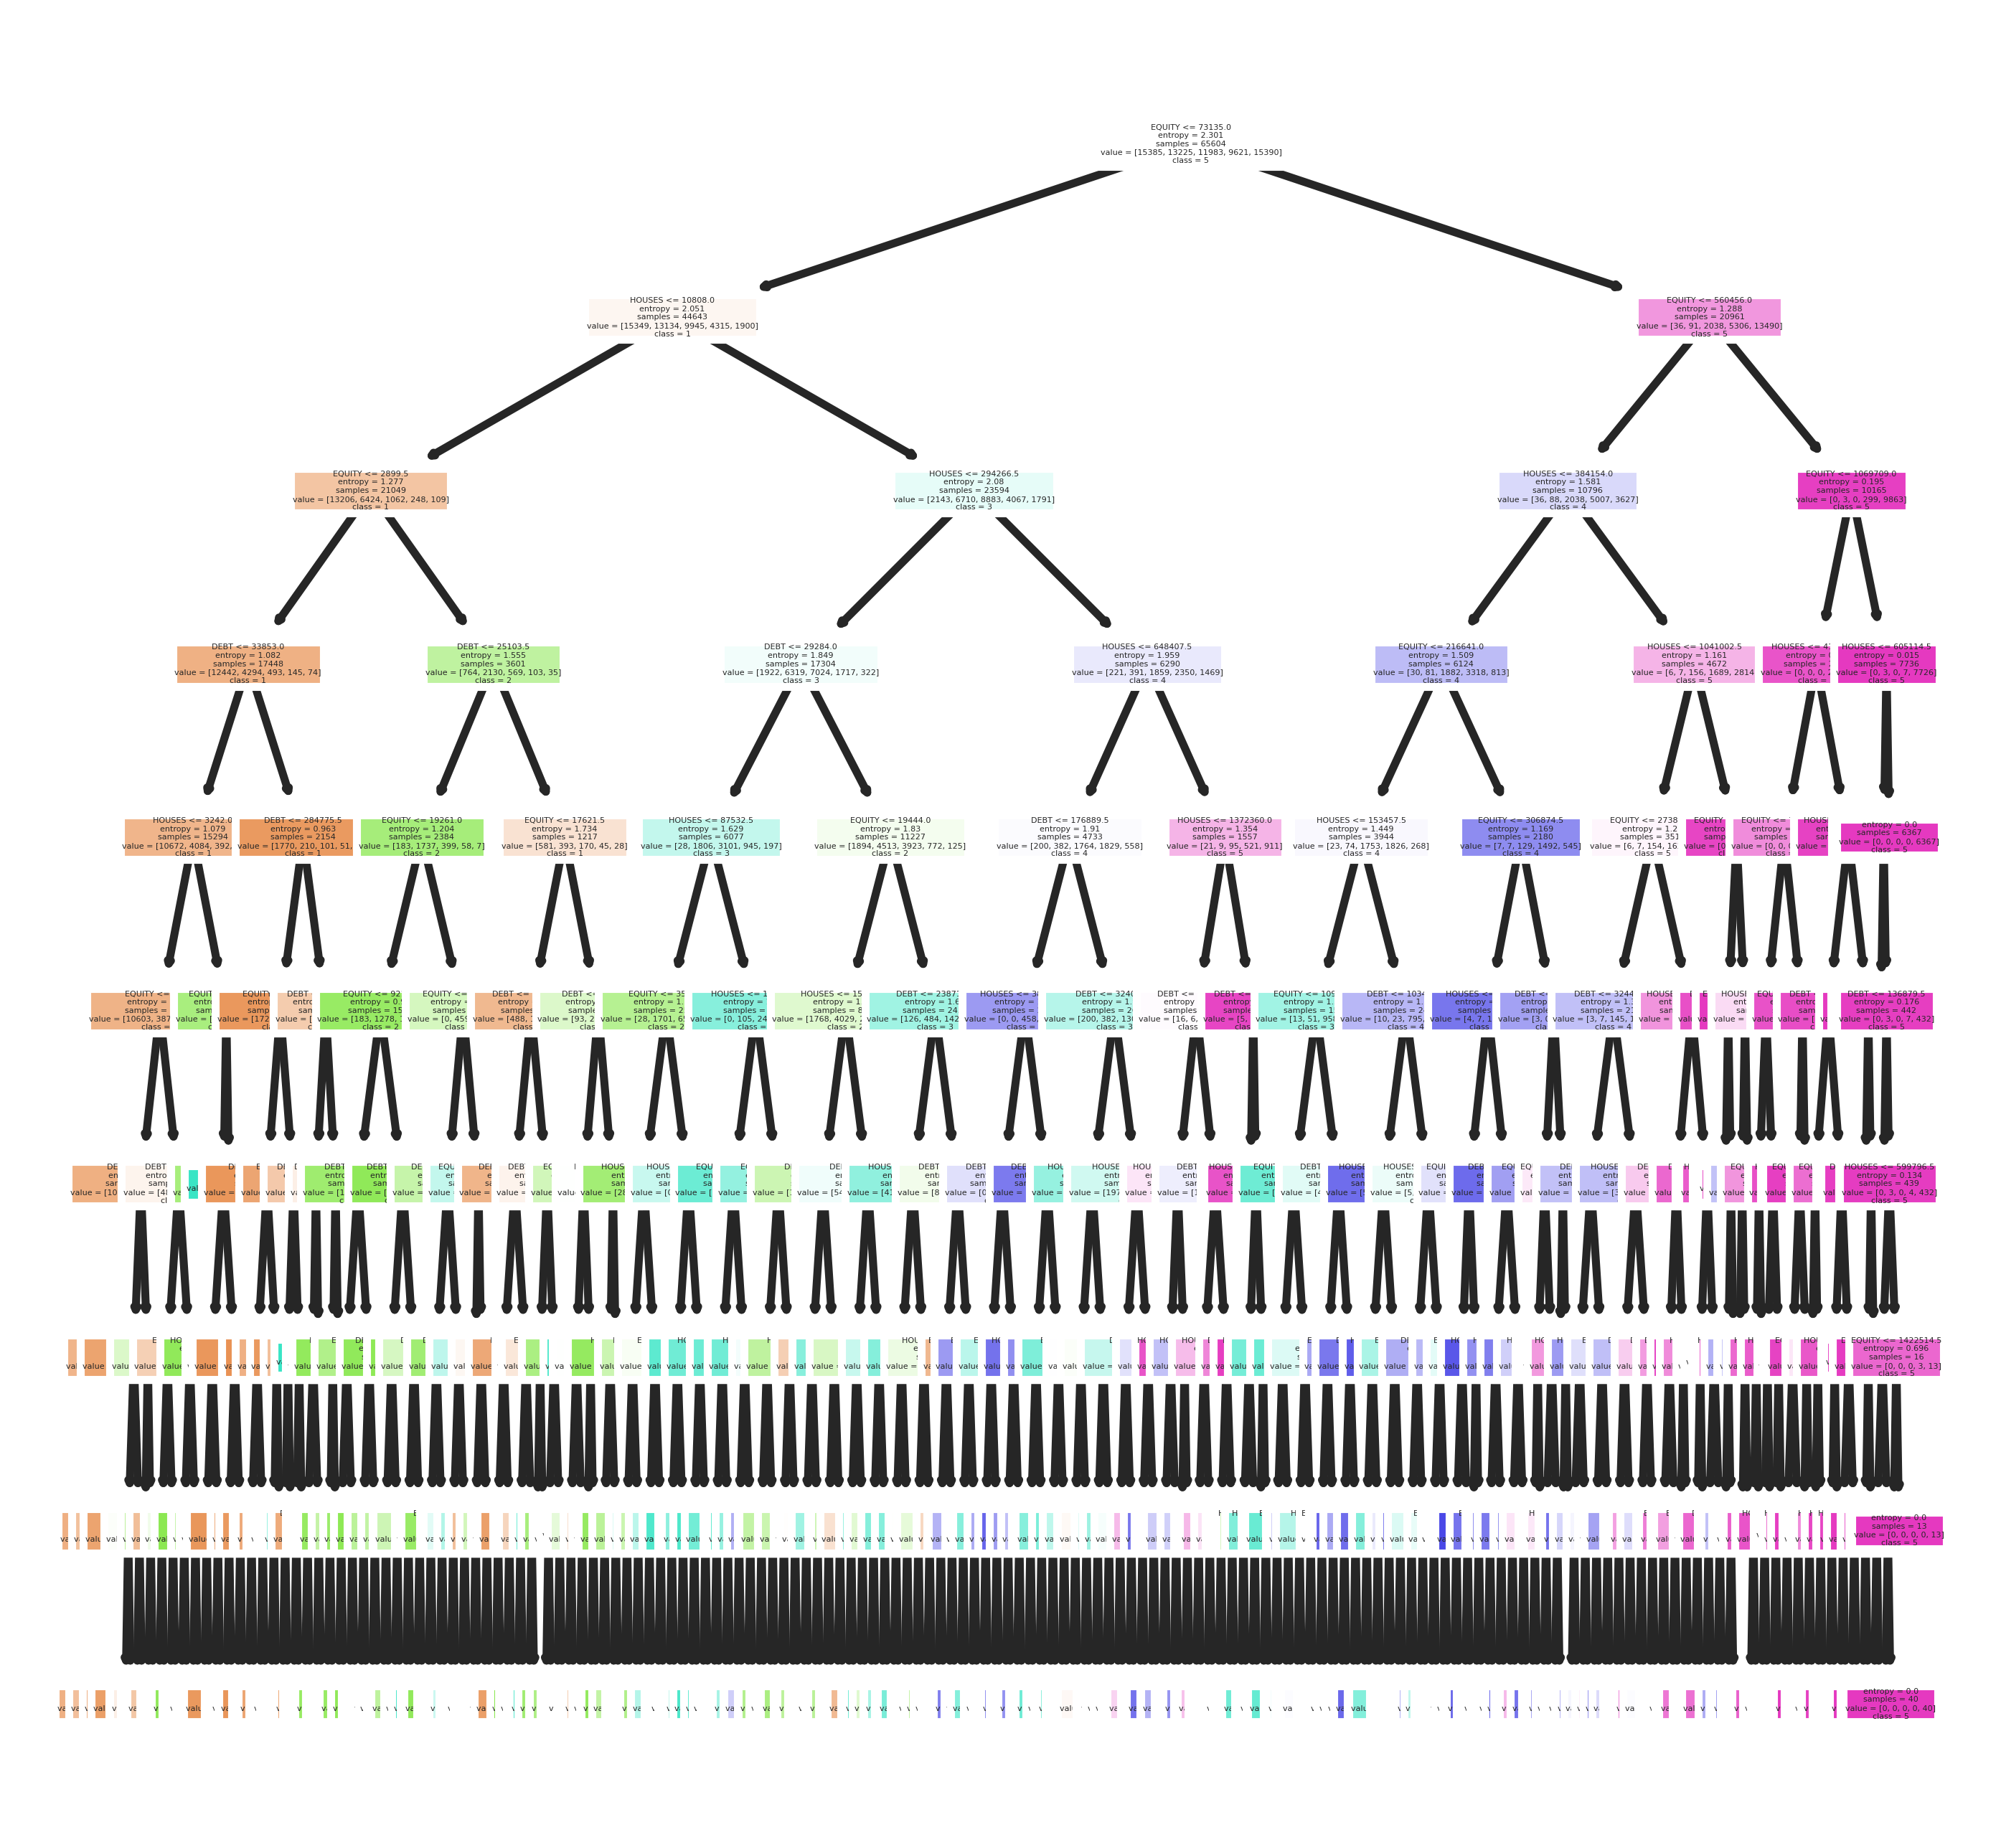

In [109]:
#visualize tree
fn=['EQUITY','HOUSES','DEBT']
cn=['1', '2', '3','4','5']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

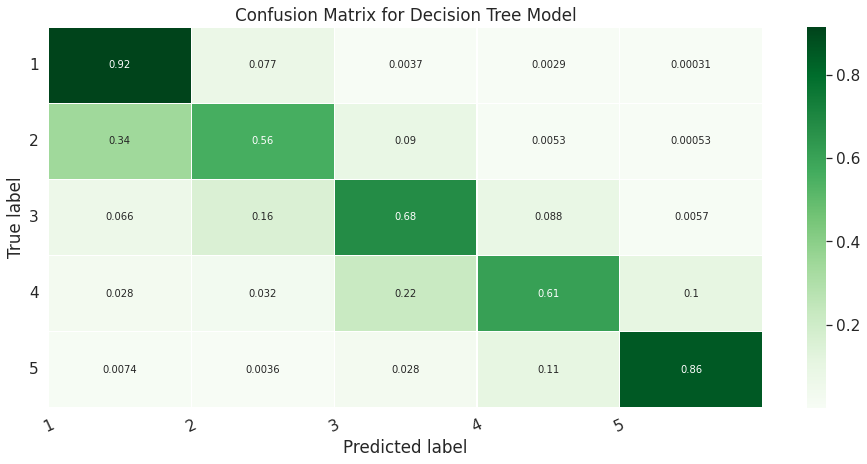

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['1', '2', '3', 
               '4', '5']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()
#plot shows some struggles with predicting 2nd and 3rd quantile 

##Random Forest

In [112]:
x = combined_data2[var_3]
y = combined_data2[["NWCAT"]]
X_train_for,x_test_for,y_train_for,y_test_for = train_test_split(x,y,test_size=0.3,random_state=1)

In [113]:
forest = RandomForestClassifier(criterion = 'gini', n_estimators=1000,
                                random_state=1, n_jobs=3)
forest.fit(X_train_for, y_train_for)

y_pred_train_for = forest.predict(X_train_for)
y_pred_test_for = forest.predict(x_test_for)

print('train accuracy: ', accuracy_score(y_train_for, y_pred_train_for))
print('test accuracy: ', accuracy_score(y_test_for, y_pred_test_for))

<ipython-input-113-5c985546a1ee>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



train accuracy:  0.9557344064386318
test accuracy:  0.9482145397638355


In [114]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_for, y_pred_test_for)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['1', '2', '3', 
               '4', '5']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
#plot shows some struggles with predicting 2nd and 3rd quantile 

##Model Evaluation

In [115]:
#what is the importance of the 3 factors equity, Debt, and houses 

#Equity represents the value that would be returned to a company's shareholders
 #if all of the assets were liquidated and all of the company's debts were paid off. 
 #We can also think of equity as a degree of residual ownership in a firm or 
 #asset after subtracting all debts associated with that asset.

#Homeownership is the largest source of wealth among families, with the median 
#value of a primary residence worth about ten times the median value of financial
# assets held by families. Housing wealth (home equity or net worth) gains are 
#built up through price appreciation and by paying off the mortgage.

#Debt  how much you owe 

model.feature_importances_

array([0.5298821 , 0.35210707, 0.11801084])

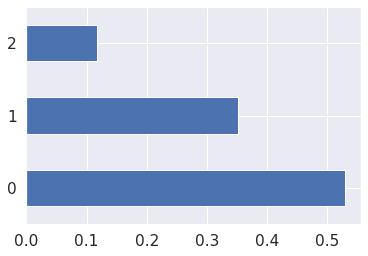

In [116]:
#also want to plot distribution of importance 

feat_importances = pd.Series(model.feature_importances_)
feat_importances.plot(kind='barh')

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[5948,  502,   24,   19,    2],
       [1967, 3196,  514,   30,    3],
       [ 348,  838, 3614,  467,   30],
       [ 114,  127,  900, 2449,  419],
       [  49,   24,  184,  695, 5653]])

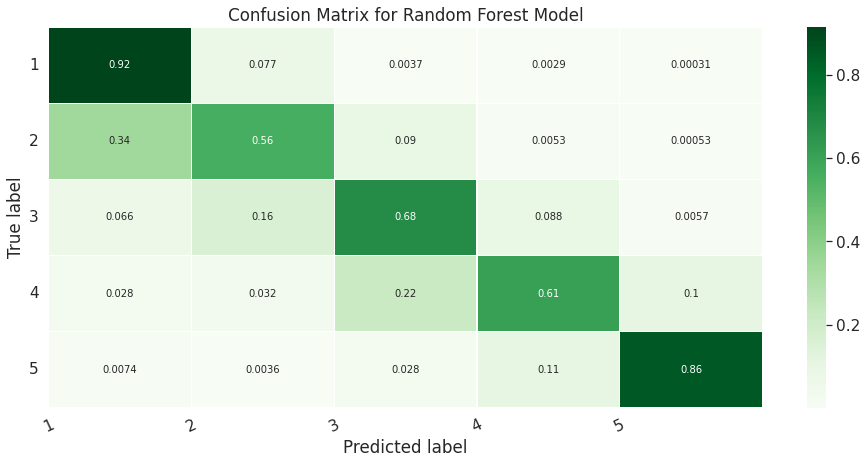

In [118]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['1', '2', '3', 
               '4', '5']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
#plot shows some struggles with predicting 2nd and 3rd quantile 

In [119]:

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.71      0.92      0.80      6495
           2       0.68      0.56      0.61      5710
           3       0.69      0.68      0.69      5297
           4       0.67      0.61      0.64      4009
           5       0.93      0.86      0.89      6605

    accuracy                           0.74     28116
   macro avg       0.73      0.72      0.73     28116
weighted avg       0.74      0.74      0.74     28116



#SCF Hypothesis Test

In [120]:
#create random numbers generated 1 to 5  
num_random15 = []
for i in range(0,93720):
  NWCAT = choice([1,2,3,4,5])
  num_random15.append(NWCAT)

num_random_15 = pd.DataFrame(num_random15)

In [121]:
num_random_15.head

<bound method NDFrame.head of        0
0      3
1      3
2      1
3      4
4      3
...   ..
93715  5
93716  2
93717  1
93718  5
93719  4

[93720 rows x 1 columns]>

In [122]:
#Kfold Cross-Validation 

#An evaluation method useful for determining how accurate the model is 
#and also how it compares to other models

#The general procedure for k-fold cross validation is the dataset is randomly 
#divided into "k" groups. In every group there occurs a train/test split 
#and a model is fit on the train set and evaluated on the test set.Then the 
#evaluation score is returned. The final step is taking a summary of all k
#groups evaluation score. 

kf = KFold(n_splits=10, random_state=1, shuffle=True )
 
acc_score = []
acc_score_random = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index,:] , y.iloc[test_index,:]
    y_random_test = num_random_15.iloc[test_index,:]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_random = accuracy_score(y_random_test, y_test)
    acc_score.append(acc)
    acc_score_random.append(acc_random)

In [123]:
from statistics import mean
acc_score
#the 10 accurary scores for the k groups of the decision tree model 
#All about 68%
acc_score_avg = mean(acc_score)
acc_score_avg

0.7939820742637644

In [124]:
acc_score_random
#about 20%
acc_score_random_avg = mean(acc_score_random)
acc_score_random_avg

0.20256081946222793

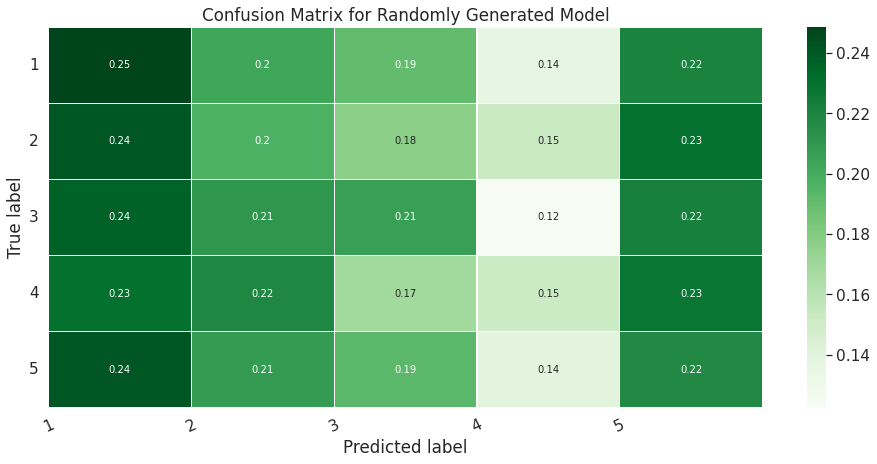

In [125]:
# Get and reshape confusion matrix data fro random 
matrix = confusion_matrix(y_random_test, pred_values)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['1', '2', '3', 
               '4', '5']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Randomly Generated Model')
plt.show()
#plot shows some struggles with predicting 2nd and 3rd quantile

In [126]:
stat, p = ttest_ind(acc_score, acc_score_random)
print('t-statistic = ', stat, 'p-value = ', p)

print('DT accuracy score mean: ', np.mean(acc_score))
print('Random model accuracy score mean: ', np.mean(acc_score_random))


t-statistic =  352.99764814288966 p-value =  5.073394275892262e-36
DT accuracy score mean:  0.7939820742637644
Random model accuracy score mean:  0.20256081946222787


In [127]:
print('NULL HYP: The decision tree model with Houses, Debt, and Equity as inputs is not better than a random chance model \n          at predicting the Networth Category of a Household.')
print('ALT HYP: The decision tree model with Houses, Debt, and Equity as inputs is better than a random chance model  \n          at predicting the Networth Category of a Household.')

if p > 0.05:
  print('We fail to reject the null hypothesis')
else:
  print('We reject the null hypothesis')

NULL HYP: The decision tree model with Houses, Debt, and Equity as inputs is not better than a random chance model 
          at predicting the Networth Category of a Household.
ALT HYP: The decision tree model with Houses, Debt, and Equity as inputs is better than a random chance model  
          at predicting the Networth Category of a Household.
We reject the null hypothesis


#OECD Data Analysis

In [128]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web

###GINI Data

In [129]:
#Reading in the OECD_Income data 
OECD_Income2 = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/Copy_income_panel2.csv', index_col=0)
OECD_Income2

Country Subject                                           Measure  \
LOCATION                                                                        
AUS       Australia   GINIB  Gini (market income, before taxes and transfers)   
AUS       Australia   GINIB  Gini (market income, before taxes and transfers)   
AUS       Australia   GINIB  Gini (market income, before taxes and transfers)   
AUS       Australia   GINIB  Gini (market income, before taxes and transfers)   
AUS       Australia   GINIB  Gini (market income, before taxes and transfers)   
...             ...     ...                                               ...   
BGR        Bulgaria   GINIB  Gini (market income, before taxes and transfers)   
BGR        Bulgaria   GINIB  Gini (market income, before taxes and transfers)   
BGR        Bulgaria   GINIB  Gini (market income, before taxes and transfers)   
BGR        Bulgaria   GINIB  Gini (market income, before taxes and transfers)   
BGR        Bulgaria   GINIB  Gini (market income, before taxes and transfers)   

          AGE         Age group DEFINITION          Definition   METHODO  \
LOCATION                                                                   
AUS       TOT  Total population    CURRENT  Current definition  METH2012   
AUS       TOT  Total population    CURRENT  Current definition  METH2012   
AUS       TOT  Total population    CURRENT  Current definition  METH2012   
AUS       TOT  Total population    CURRENT  Current definition  METH2012   
AUS       TOT  Total population    CURRENT  Current definition  METH2012   
...       ...               ...        ...                 ...       ...   
BGR       TOT  Total population    CURRENT  Current definition  METH2012   
BGR       TOT  Total population    CURRENT  Current definition  METH2012   
BGR       TOT  Total population    CURRENT  Current definition  METH2012   
BGR       TOT  Total population    CURRENT  Current definition  METH2012   
BGR       TOT  Total population    CURRENT  Current definition  METH2012   

                               Methodology  TIME  Year Unit Code       Unit  \
LOCATION                                                                      
AUS       New income definition since 2012  2012  2012    0_TO_1  0-1 scale   
AUS       New income definition since 2012  2014  2014    0_TO_1  0-1 scale   
AUS       New income definition since 2012  2016  2016    0_TO_1  0-1 scale   
AUS       New income definition since 2012  2018  2018    0_TO_1  0-1 scale   
AUS       New income definition since 2012  2020  2020    0_TO_1  0-1 scale   
...                                    ...   ...   ...       ...        ...   
BGR       New income definition since 2012  2015  2015    0_TO_1  0-1 scale   
BGR       New income definition since 2012  2016  2016    0_TO_1  0-1 scale   
BGR       New income definition since 2012  2017  2017    0_TO_1  0-1 scale   
BGR       New income definition since 2012  2018  2018    0_TO_1  0-1 scale   
BGR       New income definition since 2012  2019  2019    0_TO_1  0-1 scale   

          PowerCode Code PowerCode  Reference Period Code  Reference Period  \
LOCATION                                                                      
AUS                    0     Units                    NaN               NaN   
AUS                    0     Units                    NaN               NaN   
AUS                    0     Units                    NaN               NaN   
AUS                    0     Units                    NaN               NaN   
AUS                    0     Units                    NaN               NaN   
...                  ...       ...                    ...               ...   
BGR                    0     Units                    NaN               NaN   
BGR                    0     Units                    NaN               NaN   
BGR                    0     Units                    NaN               NaN   
BGR                    0     Units                    NaN               

In [130]:
#dropping unnecessary rows 
OECD_Income2.drop('Reference Period Code', axis=1, inplace=True)
OECD_Income2.drop('Reference Period', axis=1, inplace=True)
OECD_Income2.drop('Flags', axis=1, inplace=True)
OECD_Income2.drop('Flag Codes', axis=1, inplace=True)
OECD_Income2.drop('PowerCode', axis=1, inplace=True)
OECD_Income2.drop('PowerCode Code', axis=1, inplace=True)
OECD_Income2.drop('Unit', axis=1, inplace=True)
OECD_Income2.drop('Unit Code', axis=1, inplace=True)
OECD_Income2.drop('Year', axis=1, inplace=True)
OECD_Income2.drop('Methodology', axis=1, inplace=True)
OECD_Income2.drop('METHODO', axis=1, inplace=True)
OECD_Income2.drop('Definition', axis=1, inplace=True)
OECD_Income2.drop('DEFINITION', axis=1, inplace=True)
OECD_Income2.drop('Age group', axis=1, inplace=True)
OECD_Income2.drop('AGE', axis=1, inplace=True)
OECD_Income2.drop('Measure', axis=1, inplace=True)

OECD_Income2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, AUS to BGR
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  428 non-null    object 
 1   Subject  428 non-null    object 
 2   TIME     428 non-null    int64  
 3   Value    428 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.7+ KB


In [131]:
#converting categorical variables to num for easier analysis 
#OECD_Income2['Country'].astype('category')
#OECD_Income2['Subject'].astype('category')

#identify all categorical variables
#cat_columns = OECD_Income2.select_dtypes(['object']).columns

#convert all categorical variables to numeric
#OECD_Income2[cat_columns] = OECD_Income2[cat_columns].apply(lambda x: pd.factorize(x)[0])
#OECD_Income2

In [132]:
#Creating diff gini variable 
OECD_Income2["diff_gini"] = OECD_Income2.groupby("Country")["Value"].diff()
print(OECD_Income2)
OECD_Income2.describe()
#makes sense since only one subject (gini)

            Country Subject  TIME  Value  diff_gini
LOCATION                                           
AUS       Australia   GINIB  2012  0.463        NaN
AUS       Australia   GINIB  2014  0.483      0.020
AUS       Australia   GINIB  2016  0.469     -0.014
AUS       Australia   GINIB  2018  0.454     -0.015
AUS       Australia   GINIB  2020  0.441     -0.013
...             ...     ...   ...    ...        ...
BGR        Bulgaria   GINIB  2015  0.520      0.028
BGR        Bulgaria   GINIB  2016  0.530      0.010
BGR        Bulgaria   GINIB  2017  0.529     -0.001
BGR        Bulgaria   GINIB  2018  0.528     -0.001
BGR        Bulgaria   GINIB  2019  0.523     -0.005

[428 rows x 5 columns]


TIME       Value   diff_gini
count   428.000000  428.000000  384.000000
mean   2013.504673    0.477713    0.000021
std       3.961463    0.050515    0.011600
min    2006.000000    0.367000   -0.044000
25%    2011.000000    0.440000   -0.006000
50%    2014.000000    0.486000    0.000000
75%    2017.000000    0.513000    0.006000
max    2021.000000    0.720000    0.073000

In [133]:
#Create Pivot Table 

#OECD_income2 = OECD_Income.pivot_table(index = ["Country","TIME","MEASURE"]).dropna()
#OECD_income2

OECD_income3 = OECD_Income2.pivot_table(index = ["Country","TIME","Subject"],dropna=True,)
OECD_income3.fillna(0, inplace=True)
OECD_income3.reset_index( inplace=True)
OECD_income3

Country  TIME Subject  Value  diff_gini
0        Australia  2012   GINIB  0.463      0.000
1        Australia  2014   GINIB  0.483      0.020
2        Australia  2016   GINIB  0.469     -0.014
3        Australia  2018   GINIB  0.454     -0.015
4        Australia  2020   GINIB  0.441     -0.013
..             ...   ...     ...    ...        ...
423  United States  2017   GINIB  0.505     -0.002
424  United States  2018   GINIB  0.506      0.001
425  United States  2019   GINIB  0.505     -0.001
426  United States  2020   GINIB  0.521      0.016
427  United States  2021   GINIB  0.517     -0.004

[428 rows x 5 columns]

In [134]:
OECD_Gini = OECD_income3.pivot_table(index = ["Country","TIME"], values = 'diff_gini')
OECD_Gini

diff_gini
Country       TIME           
Australia     2012      0.000
              2014      0.020
              2016     -0.014
              2018     -0.015
              2020     -0.013
...                       ...
United States 2017     -0.002
              2018      0.001
              2019     -0.001
              2020      0.016
              2021     -0.004

[428 rows x 1 columns]

###Macro *Data*

In [135]:
OECD_short_econ = pd.read_csv('/content/drive/MyDrive/Capstone Project/Code/OECD_short_econ.csv')
OECD_short_econ

SUBJECT                  Subject LOCATION  \
0      XTEXVA01   Exports in goods, s.a.      AUS   
1      XTEXVA01   Exports in goods, s.a.      AUS   
2      XTEXVA01   Exports in goods, s.a.      AUS   
3      XTEXVA01   Exports in goods, s.a.      AUS   
4      XTEXVA01   Exports in goods, s.a.      AUS   
...         ...                      ...      ...   
14398  IRLTLT01  Long-term interest rate      CHN   
14399  IRLTLT01  Long-term interest rate      CHN   
14400  IRLTLT01  Long-term interest rate      CHN   
14401  IRLTLT01  Long-term interest rate      CHN   
14402  IRLTLT01  Long-term interest rate      CHN   

                            Country MEASURE                 Measure FREQUENCY  \
0                         Australia      GP  Growth previous period         A   
1                         Australia      GP  Growth previous period         A   
2                         Australia      GP  Growth previous period         A   
3                         Australia      GP  Growth previous period         A   
4                         Australia      GP  Growth previous period         A   
...                             ...     ...                     ...       ...   
14398  China (People's Republic of)      ST   Level, ratio or index         A   
14399  China (People's Republic of)      ST   Level, ratio or index         A   
14400  China (People's Republic of)      ST   Level, ratio or index         A   
14401  China (People's Republic of)      ST   Level, ratio or index         A   
14402  China (People's Republic of)      ST   Level, ratio or index         A   

      Frequency  TIME  Time Unit Code        Unit  PowerCode Code PowerCode  \
0        Annual  2008  2008        PC  Percentage               0     Units   
1        Annual  2009  2009        PC  Percentage               0     Units   
2        Annual  2010  2010        PC  Percentage               0     Units   
3        Annual  2011  2011        PC  Percentage               0     Units   
4        Annual  2012  2012        PC  Percentage               0     Units   
...         ...   ...   ...       ...         ...             ...       ...   
14398    Annual  2017  2017        PC  Percentage               0     Units   
14399    Annual  2018  2018        PC  Percentage               0     Units   
14400    Annual  2019  2019        PC  Percentage               0     Units   
14401    Annual  2020  2020        PC  Percentage               0     Units   
14402    Annual  2021  2021        PC  Percentage               0     Units   

      Reference Period Code Reference Period      Value Flag Codes Flags  
0                       NaN              NaN  31.570643        NaN   NaN  
1                       NaN              NaN -16.789584        NaN   NaN  
2                       NaN              NaN  37.181647        NaN   NaN  
3                       NaN              NaN  27.356442        NaN   NaN  
4                       NaN              NaN  -4.837427        NaN   NaN  
...                     ...              ...        ...        ...   ...  
14398                   NaN              NaN   3.591667        NaN   NaN  
14399                   NaN              NaN   3.579167        NaN   NaN  
14400                   NaN              NaN   3.181300        NaN   NaN  
14401                   NaN              NaN   2.924433        NaN   NaN  
14402                   NaN              NaN   3.005533        NaN   NaN  

[14403 rows x 19 columns]

In [136]:
filtered_df = OECD_short_econ.loc[(OECD_short_econ['TIME'] >= 2010)
                     & (OECD_short_econ['TIME'] < 2022)]
# Display
filtered_df

SUBJECT                  Subject LOCATION  \
2      XTEXVA01   Exports in goods, s.a.      AUS   
3      XTEXVA01   Exports in goods, s.a.      AUS   
4      XTEXVA01   Exports in goods, s.a.      AUS   
5      XTEXVA01   Exports in goods, s.a.      AUS   
6      XTEXVA01   Exports in goods, s.a.      AUS   
...         ...                      ...      ...   
14398  IRLTLT01  Long-term interest rate      CHN   
14399  IRLTLT01  Long-term interest rate      CHN   
14400  IRLTLT01  Long-term interest rate      CHN   
14401  IRLTLT01  Long-term interest rate      CHN   
14402  IRLTLT01  Long-term interest rate      CHN   

                            Country MEASURE                 Measure FREQUENCY  \
2                         Australia      GP  Growth previous period         A   
3                         Australia      GP  Growth previous period         A   
4                         Australia      GP  Growth previous period         A   
5                         Australia      GP  Growth previous period         A   
6                         Australia      GP  Growth previous period         A   
...                             ...     ...                     ...       ...   
14398  China (People's Republic of)      ST   Level, ratio or index         A   
14399  China (People's Republic of)      ST   Level, ratio or index         A   
14400  China (People's Republic of)      ST   Level, ratio or index         A   
14401  China (People's Republic of)      ST   Level, ratio or index         A   
14402  China (People's Republic of)      ST   Level, ratio or index         A   

      Frequency  TIME  Time Unit Code        Unit  PowerCode Code PowerCode  \
2        Annual  2010  2010        PC  Percentage               0     Units   
3        Annual  2011  2011        PC  Percentage               0     Units   
4        Annual  2012  2012        PC  Percentage               0     Units   
5        Annual  2013  2013        PC  Percentage               0     Units   
6        Annual  2014  2014        PC  Percentage               0     Units   
...         ...   ...   ...       ...         ...             ...       ...   
14398    Annual  2017  2017        PC  Percentage               0     Units   
14399    Annual  2018  2018        PC  Percentage               0     Units   
14400    Annual  2019  2019        PC  Percentage               0     Units   
14401    Annual  2020  2020        PC  Percentage               0     Units   
14402    Annual  2021  2021        PC  Percentage               0     Units   

      Reference Period Code Reference Period      Value Flag Codes Flags  
2                       NaN              NaN  37.181647        NaN   NaN  
3                       NaN              NaN  27.356442        NaN   NaN  
4                       NaN              NaN  -4.837427        NaN   NaN  
5                       NaN              NaN  -1.565864        NaN   NaN  
6                       NaN              NaN  -4.838842        NaN   NaN  
...                     ...              ...        ...        ...   ...  
14398                   NaN              NaN   3.591667        NaN   NaN  
14399                   NaN              NaN   3.579167        NaN   NaN  
14400                   NaN              NaN   3.181300        NaN   NaN  
14401                   NaN              NaN   2.924433        NaN   NaN  
14402                   NaN              NaN   3.005533        NaN   NaN  

[12354 rows x 19 columns]

In [137]:
filtered_df["Subject"].unique()

array(['Exports in goods, s.a.', 'Imports in goods, s.a.', 'Share prices',
       'Consumer prices: all items',
       'Gross domestic product; constant prices, s.a.',
       'Total employment: all persons, s.a.', 'Long-term interest rate',
       'Exchange rates,  monthly averages, National currency per US dollar',
       'Producer prices - Manufacturing ',
       'Unit labour cost: Total Economy, s.a.'], dtype=object)

In [138]:
cols = ['Country','TIME', 'Exports in goods, s.a.', 'Imports in goods, s.a.', 'Share prices',
       'Consumer prices: all items',
       'Gross domestic product; constant prices, s.a.',
       'Total employment: all persons, s.a.', 'Long-term interest rate',
       'Exchange rates,  monthly averages, National currency per US dollar',
       'Producer prices - Manufacturing ',
       'Unit labour cost: Total Economy, s.a.']
dfxxx = filtered_df.pivot_table(index=['Country','TIME'],
                     columns='Subject',
                     values='Value')
dfxxx

Subject             Consumer prices: all items  \
Country       TIME                               
Argentina     2010                         NaN   
              2011                         NaN   
              2012                         NaN   
              2013                         NaN   
              2014                         NaN   
...                                        ...   
United States 2017                   35.892929   
              2018                   36.943273   
              2019                   37.163004   
              2020                   37.220787   
              2021                   41.240248   

Subject             Exchange rates,  monthly averages, National currency per US dollar  \
Country       TIME                                                                       
Argentina     2010                                           3.896295                    
              2011                                           4.110140                    
              2012                                           4.536934                    
              2013                                           5.459353                    
              2014                                           8.075276                    
...                                                               ...                    
United States 2017                                                NaN                    
              2018                                                NaN                    
              2019                                                NaN                    
              2020                                                NaN                    
              2021                                                NaN                    

Subject             Exports in goods, s.a.  \
Country       TIME                           
Argentina     2010               37.695687   
              2011               42.138638   
              2012               24.252054   
              2013               21.972246   
              2014               16.167823   
...                                    ...   
United States 2017              519.876081   
              2018              560.368601   
              2019              546.691409   
              2020              467.476157   
              2021              599.970015   

Subject             Gross domestic product; constant prices, s.a.  \
Country       TIME                                                  
Argentina     2010                                            NaN   
              2011                                            NaN   
              2012                                            NaN   
              2013                                            NaN   
              2014                                            NaN   
...                                                           ...   
United States 2017                                       2.241921   
              2018                                       2.945384   
              2019                                       2.294439   
              2020                                      -2.767956   
              2021                                       5.946623   

Subject             Imports in goods, s.a.  Long-term interest rate  \
Country       TIME                                                    
Argentina     2010               49.882030                      NaN   
              2011               44.807892                      NaN   
              2012               17.263103                      NaN   
              2013               31.155454                      NaN   
              2014               14.114097                      NaN   
...                                    ...                      ...   
United States 2017              784.602554                 2.330000   
              2018              851.546887

In [139]:
dfxxx2 = dfxxx.dropna()
dfxxx2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 335 entries, ('Australia', 2010) to ('United Kingdom', 2021)
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Consumer prices: all items                                          335 non-null    float64
 1   Exchange rates,  monthly averages, National currency per US dollar  335 non-null    float64
 2   Exports in goods, s.a.                                              335 non-null    float64
 3   Gross domestic product; constant prices, s.a.                       335 non-null    float64
 4   Imports in goods, s.a.                                              335 non-null    float64
 5   Long-term interest rate                                             335 non-null    float64
 6   Producer prices - Manufacturing                                     335 non

In [140]:
dfxxx3 = dfxxx2.astype('int64')
dfxxx3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 335 entries, ('Australia', 2010) to ('United Kingdom', 2021)
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   Consumer prices: all items                                          335 non-null    int64
 1   Exchange rates,  monthly averages, National currency per US dollar  335 non-null    int64
 2   Exports in goods, s.a.                                              335 non-null    int64
 3   Gross domestic product; constant prices, s.a.                       335 non-null    int64
 4   Imports in goods, s.a.                                              335 non-null    int64
 5   Long-term interest rate                                             335 non-null    int64
 6   Producer prices - Manufacturing                                     335 non-null    int64
 

###Combined Data

In [141]:
#OECD_Gini2 = OECD_Gini.astype('int64')
OECD_Gini

diff_gini
Country       TIME           
Australia     2012      0.000
              2014      0.020
              2016     -0.014
              2018     -0.015
              2020     -0.013
...                       ...
United States 2017     -0.002
              2018      0.001
              2019     -0.001
              2020      0.016
              2021     -0.004

[428 rows x 1 columns]

In [142]:
dfxxx3

Subject              Consumer prices: all items  \
Country        TIME                               
Australia      2010                          31   
               2011                          32   
               2012                          32   
               2013                          33   
               2014                          34   
...                                         ...   
United Kingdom 2017                          36   
               2018                          36   
               2019                          37   
               2020                          36   
               2021                          38   

Subject              Exchange rates,  monthly averages, National currency per US dollar  \
Country        TIME                                                                       
Australia      2010                                                  1                    
               2011                                                  0                    
               2012                                                  0                    
               2013                                                  1                    
               2014                                                  1                    
...                                                                ...                    
United Kingdom 2017                                                  0                    
               2018                                                  0                    
               2019                                                  0                    
               2020                                                  0                    
               2021                                                  0                    

Subject              Exports in goods, s.a.  \
Country        TIME                           
Australia      2010                      95   
               2011                     108   
               2012                      82   
               2013                      83   
               2014                      76   
...                                     ...   
United Kingdom 2017                     146   
               2018                     156   
               2019                     141   
               2020                     116   
               2021                     151   

Subject              Gross domestic product; constant prices, s.a.  \
Country        TIME                                                  
Australia      2010                                              2   
               2011                                              2   
               2012                                              3   
               2013                                              2   
               2014                                              2   
...                                                            ...   
United Kingdom 2017                                              2   
               2018                                              1   
               2019                                              1   
               2020                                            -11   
               2021                                              7   

Subject              Imports in goods, s.a.  Long-term interest rate  \
Country        TIME                                                    
Australia      2010                      79                        5   
               2011                      92                        4   
               2012                      87                        3   
               2013                      72                        3   
               2014                      74                        3   
...                                     ...                      ...   
United Kingdom 2017                     204          

In [143]:
dfxxx3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 335 entries, ('Australia', 2010) to ('United Kingdom', 2021)
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   Consumer prices: all items                                          335 non-null    int64
 1   Exchange rates,  monthly averages, National currency per US dollar  335 non-null    int64
 2   Exports in goods, s.a.                                              335 non-null    int64
 3   Gross domestic product; constant prices, s.a.                       335 non-null    int64
 4   Imports in goods, s.a.                                              335 non-null    int64
 5   Long-term interest rate                                             335 non-null    int64
 6   Producer prices - Manufacturing                                     335 non-null    int64
 

In [144]:
#OECD_Gini2

In [145]:
#data_pivot= pandas.DataFrame(data.pivot_table(values = 'NR_ACTIONS', index=["HOUR", "OPID", "NAME"], columns='CONTACTED_PERSON_NEW', aggfunc='sum'))
#data_pivot.fillna(0, inplace=True)
#data_pivot.reset_index( inplace=True)
#data2_pivot= pandas.DataFrame(data2.pivot_table(values = 'AMOUNT_PA', index=["HOUR", "OPID", "NAME"], columns='PA_TYPE', aggfunc='sum'))
#data2_pivot.fillna(0, inplace=True)
#data2_pivot.reset_index( inplace=True)
all_data = pd.merge(dfxxx3, OECD_Gini,"left", on = ["Country","TIME"] )

all_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 335 entries, ('Australia', 2010) to ('United Kingdom', 2021)
Data columns (total 11 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Consumer prices: all items                                          335 non-null    int64  
 1   Exchange rates,  monthly averages, National currency per US dollar  335 non-null    int64  
 2   Exports in goods, s.a.                                              335 non-null    int64  
 3   Gross domestic product; constant prices, s.a.                       335 non-null    int64  
 4   Imports in goods, s.a.                                              335 non-null    int64  
 5   Long-term interest rate                                             335 non-null    int64  
 6   Producer prices - Manufacturing                                     335 non

In [146]:
all_data22 = all_data.dropna()
all_data22

Consumer prices: all items  \
Country        TIME                               
Australia      2012                          32   
               2014                          34   
               2016                          34   
               2018                          36   
               2020                          36   
...                                         ...   
United Kingdom 2016                          34   
               2017                          36   
               2018                          36   
               2019                          37   
               2020                          36   

                     Exchange rates,  monthly averages, National currency per US dollar  \
Country        TIME                                                                       
Australia      2012                                                  0                    
               2014                                                  1                    
               2016                                                  1                    
               2018                                                  1                    
               2020                                                  1                    
...                                                                ...                    
United Kingdom 2016                                                  0                    
               2017                                                  0                    
               2018                                                  0                    
               2019                                                  0                    
               2020                                                  0                    

                     Exports in goods, s.a.  \
Country        TIME                           
Australia      2012                      82   
               2014                      76   
               2016                      65   
               2018                      93   
               2020                      78   
...                                     ...   
United Kingdom 2016                     127   
               2017                     146   
               2018                     156   
               2019                     141   
               2020                     116   

                     Gross domestic product; constant prices, s.a.  \
Country        TIME                                                  
Australia      2012                                              3   
               2014                                              2   
               2016                                              2   
               2018                                              2   
               2020                                             -1   
...                                                            ...   
United Kingdom 2016                                              2   
               2017                                              2   
               2018                                              1   
               2019                                              1   
               2020                                            -11   

                     Imports in goods, s.a.  Long-term interest rate  \
Country        TIME                                                    
Australia      2012                      87                        3   
               2014                      74                        3   
               2016                      59                        2   
               2018                      77                        2   
               2020                      63                        0   
...                                     ...                      ...   
United Kingdom 2016                     188                        1   
  

In [147]:
all_data22.describe()

Consumer prices: all items  \
count                  241.000000   
mean                    33.912863   
std                      1.569461   
min                     30.000000   
25%                     33.000000   
50%                     34.000000   
75%                     35.000000   
max                     38.000000   

       Exchange rates,  monthly averages, National currency per US dollar  \
count                                         241.000000                    
mean                                           12.112033                    
std                                            49.828455                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             1.000000                    
max                                           290.000000                    

       Exports in goods, s.a.  Gross domestic product; constant prices, s.a.  \
count              241.000000                                     241.000000   
mean                84.709544                                       1.435685   
std                 98.617605                                       2.681148   
min                 -6.000000                                     -11.000000   
25%                 24.000000                                       0.000000   
50%                 50.000000                                       1.000000   
75%                116.000000                                       2.000000   
max                526.000000                                      24.000000   

       Imports in goods, s.a.  Long-term interest rate  \
count              241.000000               241.000000   
mean                82.738589                 2.012448   
std                 88.961287                 2.688682   
min                 -7.000000                 0.000000   
25%                 24.000000                 0.000000   
50%                 45.000000                 1.000000   
75%                128.000000                 3.000000   
max                435.000000                22.000000   

       Producer prices - Manufacturing   Share prices  \
count                        241.000000    241.000000   
mean                          35.514523      5.261411   
std                            5.262366     13.390378   
min                           27.000000    -38.000000   
25%                           33.000000     -3.000000   
50%                           34.000000      3.000000   
75%                           37.000000     14.000000   
max                           57.000000     55.000000   

       Total employment: all persons, s.a.  \
count                           241.000000   
mean                           4704.933610   
std                            5274.450785   
min                             130.000000   
25%                            1250.000000   
50%                            2211.000000   
75%                            8098.000000   
max                           21199.000000   

       Unit labour cost: Total Economy, s.a.   diff_gini  
count                             241.000000  241.000000  
mean                               34.323651   -0.000286  
std                                 3.366969    0.009251  
min                                22.000000   -0.031000  
25%                                33.000000   -0.006000  
50%                                34.000000    0.000000  
75%                                36.000000    0.004000  
max                                49.000000    0.027000

In [148]:
all_data33 = all_data22.astype('int64')
all_data33.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 241 entries, ('Australia', 2012) to ('United Kingdom', 2020)
Data columns (total 11 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   Consumer prices: all items                                          241 non-null    int64
 1   Exchange rates,  monthly averages, National currency per US dollar  241 non-null    int64
 2   Exports in goods, s.a.                                              241 non-null    int64
 3   Gross domestic product; constant prices, s.a.                       241 non-null    int64
 4   Imports in goods, s.a.                                              241 non-null    int64
 5   Long-term interest rate                                             241 non-null    int64
 6   Producer prices - Manufacturing                                     241 non-null    int64
 

In [149]:
all_data22

Consumer prices: all items  \
Country        TIME                               
Australia      2012                          32   
               2014                          34   
               2016                          34   
               2018                          36   
               2020                          36   
...                                         ...   
United Kingdom 2016                          34   
               2017                          36   
               2018                          36   
               2019                          37   
               2020                          36   

                     Exchange rates,  monthly averages, National currency per US dollar  \
Country        TIME                                                                       
Australia      2012                                                  0                    
               2014                                                  1                    
               2016                                                  1                    
               2018                                                  1                    
               2020                                                  1                    
...                                                                ...                    
United Kingdom 2016                                                  0                    
               2017                                                  0                    
               2018                                                  0                    
               2019                                                  0                    
               2020                                                  0                    

                     Exports in goods, s.a.  \
Country        TIME                           
Australia      2012                      82   
               2014                      76   
               2016                      65   
               2018                      93   
               2020                      78   
...                                     ...   
United Kingdom 2016                     127   
               2017                     146   
               2018                     156   
               2019                     141   
               2020                     116   

                     Gross domestic product; constant prices, s.a.  \
Country        TIME                                                  
Australia      2012                                              3   
               2014                                              2   
               2016                                              2   
               2018                                              2   
               2020                                             -1   
...                                                            ...   
United Kingdom 2016                                              2   
               2017                                              2   
               2018                                              1   
               2019                                              1   
               2020                                            -11   

                     Imports in goods, s.a.  Long-term interest rate  \
Country        TIME                                                    
Australia      2012                      87                        3   
               2014                      74                        3   
               2016                      59                        2   
               2018                      77                        2   
               2020                      63                        0   
...                                     ...                      ...   
United Kingdom 2016                     188                        1   
  

In [150]:
all_data33.describe()

Consumer prices: all items  \
count                  241.000000   
mean                    33.912863   
std                      1.569461   
min                     30.000000   
25%                     33.000000   
50%                     34.000000   
75%                     35.000000   
max                     38.000000   

       Exchange rates,  monthly averages, National currency per US dollar  \
count                                         241.000000                    
mean                                           12.112033                    
std                                            49.828455                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             1.000000                    
max                                           290.000000                    

       Exports in goods, s.a.  Gross domestic product; constant prices, s.a.  \
count              241.000000                                     241.000000   
mean                84.709544                                       1.435685   
std                 98.617605                                       2.681148   
min                 -6.000000                                     -11.000000   
25%                 24.000000                                       0.000000   
50%                 50.000000                                       1.000000   
75%                116.000000                                       2.000000   
max                526.000000                                      24.000000   

       Imports in goods, s.a.  Long-term interest rate  \
count              241.000000               241.000000   
mean                82.738589                 2.012448   
std                 88.961287                 2.688682   
min                 -7.000000                 0.000000   
25%                 24.000000                 0.000000   
50%                 45.000000                 1.000000   
75%                128.000000                 3.000000   
max                435.000000                22.000000   

       Producer prices - Manufacturing   Share prices  \
count                        241.000000    241.000000   
mean                          35.514523      5.261411   
std                            5.262366     13.390378   
min                           27.000000    -38.000000   
25%                           33.000000     -3.000000   
50%                           34.000000      3.000000   
75%                           37.000000     14.000000   
max                           57.000000     55.000000   

       Total employment: all persons, s.a.  \
count                           241.000000   
mean                           4704.933610   
std                            5274.450785   
min                             130.000000   
25%                            1250.000000   
50%                            2211.000000   
75%                            8098.000000   
max                           21199.000000   

       Unit labour cost: Total Economy, s.a.  diff_gini  
count                             241.000000      241.0  
mean                               34.323651        0.0  
std                                 3.366969        0.0  
min                                22.000000        0.0  
25%                                33.000000        0.0  
50%                                34.000000        0.0  
75%                                36.000000        0.0  
max                                49.000000        0.0

In [151]:
#all_datax = all_data.rename(columns = {'Value_x':'Macro','Value_y':'Gini','Subject_x':'Mac_Cat'})
#all_datax

In [152]:
#all_datax.info()

In [153]:
#all_data10 = all_datax.dropna()
#convert Value_y column to integers 
#all_data10['Macro'].astype('int64')
#all_data10.rename(columns = {'Value_x':'Macro','Value_y':'Gini','Subject':'Mac_Cat'})
#all_data10.info()

In [154]:
#all_data10

In [155]:
#data_melt = all_data10.melt(id_vars=["Country", "TIME","Mac_Cat"],var_name=['Macro'])
#data_melt

In [156]:
#need to combine data_melt rows with the same "Country","TIME"(should have 10 values per year and country )
#data_melt.groupby(["Country","TIME"])
#data_melt

In [157]:
#all_data10.describe().plot().figure.size(10,12)

#all_data10.describe()

In [158]:
#all_data10.unstack()

In [159]:
#since were looking at the impact of all the subject X values on the diff_gini variable 
#we can eliminate TIME, Country, Subject_y, Value_y 
#all_data11 = all_data10
#all_data11.drop('Country', axis=1, inplace=True)
#all_data11.drop('TIME', axis=1, inplace=True)
#all_data11.drop('Subject_y', axis=1, inplace=True)
#all_data11.drop('Value_y', axis=1, inplace=True)

In [160]:
#all_data10.groupby(all_data10['Subject_x'])
#all_data10.reset_index( inplace=True)
#all_data10

In [161]:
#df_0 =df_pivot10.loc(df_pivot10['Subject_x'] == 0) 

In [162]:
#from scipy import stats
#stats.probplot(all_data10, plot=plt);

In [163]:
#the standard deviations of the data have different ranges so I want to 

###Standardize Data

In [164]:
all_data22

Consumer prices: all items  \
Country        TIME                               
Australia      2012                          32   
               2014                          34   
               2016                          34   
               2018                          36   
               2020                          36   
...                                         ...   
United Kingdom 2016                          34   
               2017                          36   
               2018                          36   
               2019                          37   
               2020                          36   

                     Exchange rates,  monthly averages, National currency per US dollar  \
Country        TIME                                                                       
Australia      2012                                                  0                    
               2014                                                  1                    
               2016                                                  1                    
               2018                                                  1                    
               2020                                                  1                    
...                                                                ...                    
United Kingdom 2016                                                  0                    
               2017                                                  0                    
               2018                                                  0                    
               2019                                                  0                    
               2020                                                  0                    

                     Exports in goods, s.a.  \
Country        TIME                           
Australia      2012                      82   
               2014                      76   
               2016                      65   
               2018                      93   
               2020                      78   
...                                     ...   
United Kingdom 2016                     127   
               2017                     146   
               2018                     156   
               2019                     141   
               2020                     116   

                     Gross domestic product; constant prices, s.a.  \
Country        TIME                                                  
Australia      2012                                              3   
               2014                                              2   
               2016                                              2   
               2018                                              2   
               2020                                             -1   
...                                                            ...   
United Kingdom 2016                                              2   
               2017                                              2   
               2018                                              1   
               2019                                              1   
               2020                                            -11   

                     Imports in goods, s.a.  Long-term interest rate  \
Country        TIME                                                    
Australia      2012                      87                        3   
               2014                      74                        3   
               2016                      59                        2   
               2018                      77                        2   
               2020                      63                        0   
...                                     ...                      ...   
United Kingdom 2016                     188                        1   
  

In [165]:
GINI_DATA = all_data22.reset_index()
GINI_DATA

Country  TIME  Consumer prices: all items  \
0         Australia  2012                          32   
1         Australia  2014                          34   
2         Australia  2016                          34   
3         Australia  2018                          36   
4         Australia  2020                          36   
..              ...   ...                         ...   
236  United Kingdom  2016                          34   
237  United Kingdom  2017                          36   
238  United Kingdom  2018                          36   
239  United Kingdom  2019                          37   
240  United Kingdom  2020                          36   

     Exchange rates,  monthly averages, National currency per US dollar  \
0                                                    0                    
1                                                    1                    
2                                                    1                    
3                                                    1                    
4                                                    1                    
..                                                 ...                    
236                                                  0                    
237                                                  0                    
238                                                  0                    
239                                                  0                    
240                                                  0                    

     Exports in goods, s.a.  Gross domestic product; constant prices, s.a.  \
0                        82                                              3   
1                        76                                              2   
2                        65                                              2   
3                        93                                              2   
4                        78                                             -1   
..                      ...                                            ...   
236                     127                                              2   
237                     146                                              2   
238                     156                                              1   
239                     141                                              1   
240                     116                                            -11   

     Imports in goods, s.a.  Long-term interest rate  \
0                        87                        3   
1                        74                        3   
2                        59                        2   
3                        77                        2   
4                        63                        0   
..                      ...                      ...   
236                     188                        1   
237                     204                        1   
238                     218                        1   
239                     205                        0   
240                     172                        0   

     Producer prices - Manufacturing   Share prices  \
0                                  31            -4   
1                                  35             6   
2                                  32            -3   
3                                  39             3   
4                                  38            -5   
..                                ...           ...   
236                                36            -1   
237                                38            13   
238                                38             0   
239                                39            -1   
240                                37           -13   

     Total employment: all persons, s.a.  \
0                                   5676   
1                                   5770   
2                      

In [166]:
GINI_DATA['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom'], dtype=object)

In [167]:
#converting country values to integers 
GINI_DATA['Country'] = GINI_DATA['Country'].replace(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                          21,22,23,24,25,26,27])

In [168]:
GINI_DATA.describe()

Country         TIME  Consumer prices: all items  \
count  241.000000   241.000000                  241.000000   
mean    14.481328  2014.908714                   33.912863   
std      7.713129     2.932570                    1.569461   
min      1.000000  2010.000000                   30.000000   
25%      8.000000  2012.000000                   33.000000   
50%     14.000000  2015.000000                   34.000000   
75%     21.000000  2017.000000                   35.000000   
max     27.000000  2020.000000                   38.000000   

       Exchange rates,  monthly averages, National currency per US dollar  \
count                                         241.000000                    
mean                                           12.112033                    
std                                            49.828455                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             1.000000                    
max                                           290.000000                    

       Exports in goods, s.a.  Gross domestic product; constant prices, s.a.  \
count              241.000000                                     241.000000   
mean                84.709544                                       1.435685   
std                 98.617605                                       2.681148   
min                 -6.000000                                     -11.000000   
25%                 24.000000                                       0.000000   
50%                 50.000000                                       1.000000   
75%                116.000000                                       2.000000   
max                526.000000                                      24.000000   

       Imports in goods, s.a.  Long-term interest rate  \
count              241.000000               241.000000   
mean                82.738589                 2.012448   
std                 88.961287                 2.688682   
min                 -7.000000                 0.000000   
25%                 24.000000                 0.000000   
50%                 45.000000                 1.000000   
75%                128.000000                 3.000000   
max                435.000000                22.000000   

       Producer prices - Manufacturing   Share prices  \
count                        241.000000    241.000000   
mean                          35.514523      5.261411   
std                            5.262366     13.390378   
min                           27.000000    -38.000000   
25%                           33.000000     -3.000000   
50%                           34.000000      3.000000   
75%                           37.000000     14.000000   
max                           57.000000     55.000000   

       Total employment: all persons, s.a.  \
count                           241.000000   
mean                           4704.933610   
std                            5274.450785   
min                             130.000000   
25%                            1250.000000   
50%                            2211.000000   
75%                            8098.000000   
max                           21199.000000   

       Unit labour cost: Total Economy, s.a.   diff_gini  
count                             241.000000  241.000000  
mean                               34.323651   -0.000286  
std                                 3.366969    0.009251  
min                                22.000000   -0.031000  
25%                                33.000000   -0.006000  
50%                                34.000000    0.000000  
75%                                36.000000    0.004000  
max                                49.000000    0.027000

In [169]:
#Standardization (Standard Scalar) Code:

#Use sklearn to remove the mean and scale the data to unit varience. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(GINI_DATA)

#look at mean and standard deviation 
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))


[ 0.00000000e+00 -1.22502285e-14  2.09330018e-15  2.94831011e-17
  8.84493032e-17  3.68538763e-18 -4.42246516e-17  2.94831011e-17
  3.24314112e-16  2.67190603e-17  2.94831011e-17  3.39055662e-16
  3.68538763e-18]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [170]:
#Standardization (Standard Scalar) Code:

#As expected, the mean of each variable is now around zero and the 
#standard deviation is set to 1. Thus, all the variable values lie 
#within the same range.

print('Min values (Loan Amount, Int rate and Installment): ', data_scaled.min(axis=0))
print('Max values (Loan Amount, Int rate and Installment): ', data_scaled.max(axis=0))


#However, the minimum and maximum values vary according to how spread out the variable was, 
#to begin with, and is highly influenced by the presence of outliers.

Min values (Loan Amount, Int rate and Installment):  [-1.75147917 -1.67734443 -2.49831349 -0.24358051 -0.92172514 -4.64784688
 -1.01083689 -0.75004644 -1.6213701  -3.23750728 -0.86918146 -3.6677793
 -3.3269657 ]
Max values (Loan Amount, Int rate and Installment):  [1.62641202 1.73973086 2.60958514 5.58849958 4.48407622 8.43343054
 3.96795661 7.44943027 4.09135203 3.72223286 3.13367097 4.36799171
 2.95570474]


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



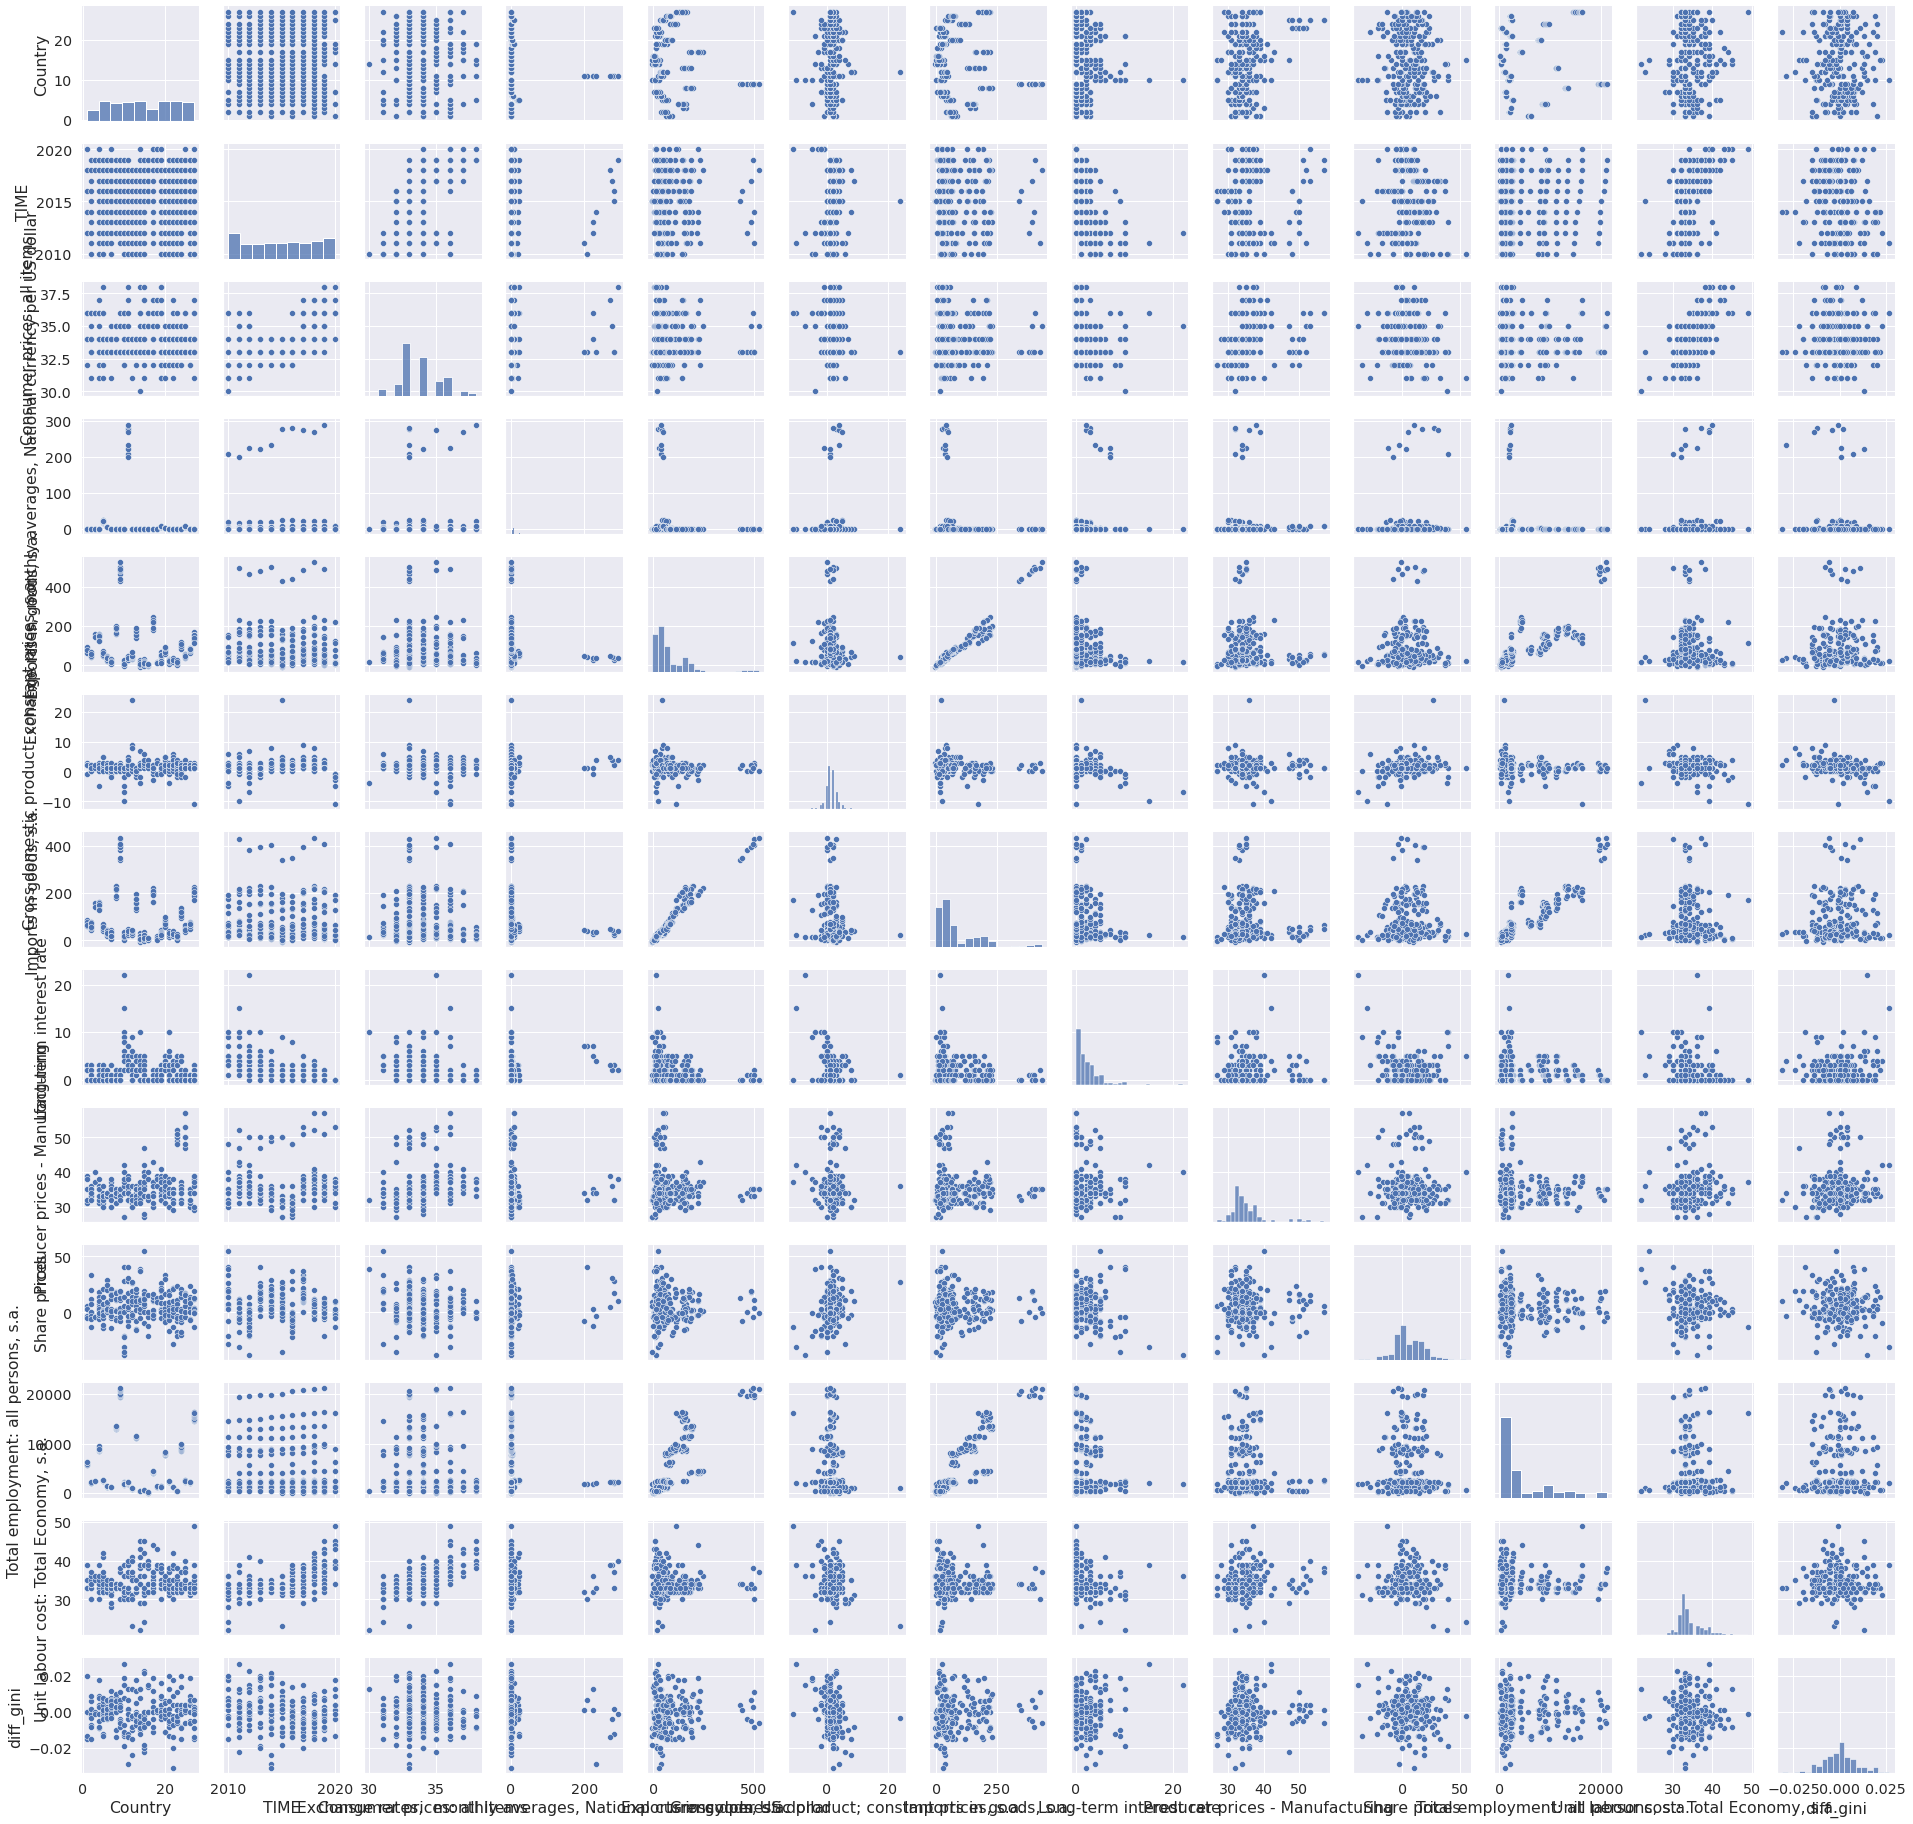

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
sns.pairplot(GINI_DATA);
#GINI_DATA.plot()


In [172]:
GINI_DATA.corr()

Country      TIME  \
Country                                             1.000000 -0.011497   
TIME                                               -0.011497  1.000000   
Consumer prices: all items                         -0.020271  0.647361   
Exchange rates,  monthly averages, National cur... -0.108597 -0.000357   
Exports in goods, s.a.                             -0.121877  0.011895   
Gross domestic product; constant prices, s.a.       0.010167  0.094108   
Imports in goods, s.a.                             -0.068494  0.013164   
Long-term interest rate                            -0.010939 -0.550496   
Producer prices - Manufacturing                     0.329142  0.069476   
Share prices                                       -0.001869 -0.031859   
Total employment: all persons, s.a.                 0.013893  0.014282   
Unit labour cost: Total Economy, s.a.               0.066175  0.587460   
diff_gini                                           0.018115 -0.167148   

                                                    Consumer prices: all items  \
Country                                                              -0.020271   
TIME                                                                  0.647361   
Consumer prices: all items                                            1.000000   
Exchange rates,  monthly averages, National cur...                    0.099225   
Exports in goods, s.a.                                               -0.012198   
Gross domestic product; constant prices, s.a.                        -0.089959   
Imports in goods, s.a.                                                0.001149   
Long-term interest rate                                              -0.188338   
Producer prices - Manufacturing                                       0.274347   
Share prices                                                         -0.164859   
Total employment: all persons, s.a.                                  -0.017980   
Unit labour cost: Total Economy, s.a.                                 0.671638   
diff_gini                                                            -0.024397   

                                                    Exchange rates,  monthly averages, National currency per US dollar  \
Country                                                                                     -0.108597                    
TIME                                                                                        -0.000357                    
Consumer prices: all items                                                                   0.099225                    
Exchange rates,  monthly averages, National cur...                                           1.000000                    
Exports in goods, s.a.                                                                      -0.107450                    
Gross domestic product; constant prices, s.a.                                                0.092387                    
Imports in goods, s.a.                                                                      -0.121533                    
Long-term interest rate                                                                      0.146599                    
Producer prices - Manufacturing                                                             -0.027997                    
Share prices                                                                                 0.101809                    
Total employment: all persons, s.a.                                                         -0.117350                    
Unit labour cost: Total Economy, s.a.                                                        0.077245                    
diff_gini                                                                                   -0.082529                    

                                                    Exports in goods, s.a.  \
Country                                                          -0.121877   
TI

In [173]:
dfbbb = GINI_DATA.assign(binary= np.select([GINI_DATA.diff_gini < 0, GINI_DATA.diff_gini >0, GINI_DATA.diff_gini == 0],[-1, 1,0]))
dfbbb

Country  TIME  Consumer prices: all items  \
0          1  2012                          32   
1          1  2014                          34   
2          1  2016                          34   
3          1  2018                          36   
4          1  2020                          36   
..       ...   ...                         ...   
236       27  2016                          34   
237       27  2017                          36   
238       27  2018                          36   
239       27  2019                          37   
240       27  2020                          36   

     Exchange rates,  monthly averages, National currency per US dollar  \
0                                                    0                    
1                                                    1                    
2                                                    1                    
3                                                    1                    
4                                                    1                    
..                                                 ...                    
236                                                  0                    
237                                                  0                    
238                                                  0                    
239                                                  0                    
240                                                  0                    

     Exports in goods, s.a.  Gross domestic product; constant prices, s.a.  \
0                        82                                              3   
1                        76                                              2   
2                        65                                              2   
3                        93                                              2   
4                        78                                             -1   
..                      ...                                            ...   
236                     127                                              2   
237                     146                                              2   
238                     156                                              1   
239                     141                                              1   
240                     116                                            -11   

     Imports in goods, s.a.  Long-term interest rate  \
0                        87                        3   
1                        74                        3   
2                        59                        2   
3                        77                        2   
4                        63                        0   
..                      ...                      ...   
236                     188                        1   
237                     204                        1   
238                     218                        1   
239                     205                        0   
240                     172                        0   

     Producer prices - Manufacturing   Share prices  \
0                                  31            -4   
1                                  35             6   
2                                  32            -3   
3                                  39             3   
4                                  38            -5   
..                                ...           ...   
236                                36            -1   
237                                38            13   
238                                38             0   
239                                39            -1   
240                                37           -13   

     Total employment: all persons, s.a.  \
0                                   5676   
1                                   5770   
2                                   5987   
3                                   6293   
4           

In [174]:
dfbbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             241 non-null    int64  
 1   TIME                                                                241 non-null    int64  
 2   Consumer prices: all items                                          241 non-null    int64  
 3   Exchange rates,  monthly averages, National currency per US dollar  241 non-null    int64  
 4   Exports in goods, s.a.                                              241 non-null    int64  
 5   Gross domestic product; constant prices, s.a.                       241 non-null    int64  
 6   Imports in goods, s.a.                                              241 non-null    int64  
 7   Long-term interes

In [175]:
dfbbb

Country  TIME  Consumer prices: all items  \
0          1  2012                          32   
1          1  2014                          34   
2          1  2016                          34   
3          1  2018                          36   
4          1  2020                          36   
..       ...   ...                         ...   
236       27  2016                          34   
237       27  2017                          36   
238       27  2018                          36   
239       27  2019                          37   
240       27  2020                          36   

     Exchange rates,  monthly averages, National currency per US dollar  \
0                                                    0                    
1                                                    1                    
2                                                    1                    
3                                                    1                    
4                                                    1                    
..                                                 ...                    
236                                                  0                    
237                                                  0                    
238                                                  0                    
239                                                  0                    
240                                                  0                    

     Exports in goods, s.a.  Gross domestic product; constant prices, s.a.  \
0                        82                                              3   
1                        76                                              2   
2                        65                                              2   
3                        93                                              2   
4                        78                                             -1   
..                      ...                                            ...   
236                     127                                              2   
237                     146                                              2   
238                     156                                              1   
239                     141                                              1   
240                     116                                            -11   

     Imports in goods, s.a.  Long-term interest rate  \
0                        87                        3   
1                        74                        3   
2                        59                        2   
3                        77                        2   
4                        63                        0   
..                      ...                      ...   
236                     188                        1   
237                     204                        1   
238                     218                        1   
239                     205                        0   
240                     172                        0   

     Producer prices - Manufacturing   Share prices  \
0                                  31            -4   
1                                  35             6   
2                                  32            -3   
3                                  39             3   
4                                  38            -5   
..                                ...           ...   
236                                36            -1   
237                                38            13   
238                                38             0   
239                                39            -1   
240                                37           -13   

     Total employment: all persons, s.a.  \
0                                   5676   
1                                   5770   
2                                   5987   
3                                   6293   
4           

In [176]:
#converting country values to integers 
dfbbb['binary'] = dfbbb['binary'].replace([0,-1,1],['NoChange','Negative','Positive'])
dfbbb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             241 non-null    int64  
 1   TIME                                                                241 non-null    int64  
 2   Consumer prices: all items                                          241 non-null    int64  
 3   Exchange rates,  monthly averages, National currency per US dollar  241 non-null    int64  
 4   Exports in goods, s.a.                                              241 non-null    int64  
 5   Gross domestic product; constant prices, s.a.                       241 non-null    int64  
 6   Imports in goods, s.a.                                              241 non-null    int64  
 7   Long-term interes

##Decision Tree with Differenced Inputs 

###Train-Test Split

In [285]:
dfxxxx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 2 to 216
Data columns (total 24 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   binary                                                              165 non-null    object 
 1   Country                                                             165 non-null    int64  
 2   TIME                                                                165 non-null    int64  
 3   Consumer prices: all items                                          165 non-null    int64  
 4   Exchange rates,  monthly averages, National currency per US dollar  165 non-null    int64  
 5   Exports in goods, s.a.                                              165 non-null    int64  
 6   Gross domestic product; constant prices, s.a.                       165 non-null    int64  
 7   Imports in goods,

In [286]:
#Creating diff input variables 
dfxxxx["diff_con_price"] = dfxxxx.groupby("Country")["Consumer prices: all items"].diff()
dfxxxx["diff_exch_rates"] = dfxxxx.groupby("Country")["Exchange rates,  monthly averages, National currency per US dollar"].diff()
dfxxxx["diff_export_goods"] = dfxxxx.groupby("Country")["Exports in goods, s.a."].diff()
dfxxxx["diff_GDP"] = dfxxxx.groupby("Country")["Gross domestic product; constant prices, s.a."].diff()
dfxxxx["diff_imports"] = dfxxxx.groupby("Country")["Imports in goods, s.a."].diff()
dfxxxx["diff_long_int_rates"] = dfxxxx.groupby("Country")["Long-term interest rate"].diff()
dfxxxx["diff_producer_price_manufacturing"] = dfxxxx.groupby("Country")["Producer prices - Manufacturing "].diff()
dfxxxx["diff_share_prices"] = dfxxxx.groupby("Country")["Share prices"].diff()
dfxxxx["diff_tot_unemployment"] = dfxxxx.groupby("Country")["Total employment: all persons, s.a."].diff()
dfxxxx["diff_unit_labor_cost"] = dfxxxx.groupby("Country")["Unit labour cost: Total Economy, s.a."].diff()


dfxxxx
#makes sense since only one subject (gini)

binary  Country  TIME  Consumer prices: all items  \
2    Negative        1  2018                          36   
3    Negative        1  2020                          36   
6    Negative        2  2012                          33   
7    Positive        2  2013                          33   
8    Negative        2  2014                          34   
..        ...      ...   ...                         ...   
212  Positive       27  2015                          33   
213  Negative       27  2016                          34   
214  Positive       27  2018                          36   
215  Negative       27  2019                          37   
216  Negative       27  2020                          36   

     Exchange rates,  monthly averages, National currency per US dollar  \
2                                                    1                    
3                                                    1                    
6                                                    0                    
7                                                    0                    
8                                                    0                    
..                                                 ...                    
212                                                  0                    
213                                                  0                    
214                                                  0                    
215                                                  0                    
216                                                  0                    

     Exports in goods, s.a.  Gross domestic product; constant prices, s.a.  \
2                        93                                              2   
3                        78                                             -1   
6                        51                                              0   
7                        61                                              0   
8                        60                                              0   
..                      ...                                            ...   
212                     133                                              2   
213                     127                                              2   
214                     156                                              1   
215                     141                                              1   
216                     116                                            -11   

     Imports in goods, s.a.  Long-term interest rate  \
2                        77                        2   
3                        63                        0   
6                        55                        2   
7                        62                        2   
8                        60                        1   
..                      ...                      ...   
212                     194                        1   
213                     188                        1   
214                     218                        1   
215                     205                        0   
216                     172                        0   

     Producer prices - Manufacturing   ...  diff_con_price  diff_exch_rates  \
2                                  39  ...             NaN              NaN   
3                                  38  ...            0.00             0.00   
6                                  34  ...             NaN              NaN   
7                                  33  ...            0.00             0.00   
8                                  33  ...            1.00             0.00   
..                                ...  ...             ...              ...   
212                                30  ...           -1.00             0.00   
213                                36  ...            1.00             0.00   
214                                38  ...            2.00      

In [287]:
dfxxxx = dfxxxx.dropna() 
dfxxxx

binary  Country  TIME  Consumer prices: all items  \
3    Negative        1  2020                          36   
7    Positive        2  2013                          33   
8    Negative        2  2014                          34   
9    Positive        2  2015                          33   
10   Positive        2  2016                          34   
..        ...      ...   ...                         ...   
212  Positive       27  2015                          33   
213  Negative       27  2016                          34   
214  Positive       27  2018                          36   
215  Negative       27  2019                          37   
216  Negative       27  2020                          36   

     Exchange rates,  monthly averages, National currency per US dollar  \
3                                                    1                    
7                                                    0                    
8                                                    0                    
9                                                    0                    
10                                                   0                    
..                                                 ...                    
212                                                  0                    
213                                                  0                    
214                                                  0                    
215                                                  0                    
216                                                  0                    

     Exports in goods, s.a.  Gross domestic product; constant prices, s.a.  \
3                        78                                             -1   
7                        61                                              0   
8                        60                                              0   
9                        41                                              1   
10                       50                                              1   
..                      ...                                            ...   
212                     133                                              2   
213                     127                                              2   
214                     156                                              1   
215                     141                                              1   
216                     116                                            -11   

     Imports in goods, s.a.  Long-term interest rate  \
3                        63                        0   
7                        62                        2   
8                        60                        1   
9                        42                        0   
10                       53                        0   
..                      ...                      ...   
212                     194                        1   
213                     188                        1   
214                     218                        1   
215                     205                        0   
216                     172                        0   

     Producer prices - Manufacturing   ...  diff_con_price  diff_exch_rates  \
3                                  38  ...            0.00             0.00   
7                                  33  ...            0.00             0.00   
8                                  33  ...            1.00             0.00   
9                                  32  ...           -1.00             0.00   
10                                 32  ...            1.00             0.00   
..                                ...  ...             ...              ...   
212                                30  ...           -1.00             0.00   
213                                36  ...            1.00             0.00   
214                                38  ...            2.00      

In [288]:
#want to run the model with all variables first and then use cross validation and 
#other feature selection methods to reduce dimensionality


#with a train and test dataset we select the features from the train set and then transfer changes to the test set later

x=dfxxxx.drop(["binary","diff_gini","Country","TIME"], axis=1)
y = dfxxxx[["binary"]]
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [289]:
#Decision Tree Model 
model = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(x_test)

#Evaluating Performance 
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(x_test)

print('train accuracy: ', accuracy_score(y_train, y_pred_train))
print('test accuracy: ', accuracy_score(y_test, y_pred_test))

train accuracy:  0.7346938775510204
test accuracy:  0.5238095238095238


###Feature Selection

In [290]:
#Need to reduce dimensionality of the model and determine what features will 
#be the best inputs.

#will first eliminate features that are highly correlated with one another 

#vif measures how much the vehavior (variance) of an independent variable is influence or inflated by its 
#interaction/correlation with the other independent varaibles. 

#conducting a variance inflation factor 
#need to drop "NWCAT" because that is the dependent variable we will be using in our analysis. 
X=dfxxxx.drop(["TIME",'Country','diff_gini','binary'], axis=1)
vif4 = pd.DataFrame()
vif4["features"] = X.columns
vif4["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif4

features  vif_Factor
0                          Consumer prices: all items      522.88
1   Exchange rates,  monthly averages, National cu...        1.66
2                              Exports in goods, s.a.       51.06
3       Gross domestic product; constant prices, s.a.        3.64
4                              Imports in goods, s.a.      102.92
5                             Long-term interest rate        2.81
6                    Producer prices - Manufacturing        57.42
7                                        Share prices        3.44
8                 Total employment: all persons, s.a.       18.86
9               Unit labour cost: Total Economy, s.a.      423.32
10                                     diff_con_price        2.01
11                                    diff_exch_rates        1.44
12                                  diff_export_goods       13.64
13                                           diff_GDP        3.88
14                                       diff_imports       13.55
15                                diff_long_int_rates        2.07
16                  diff_producer_price_manufacturing        1.97
17                                  diff_share_prices        2.50
18                              diff_tot_unemployment        2.51
19                               diff_unit_labor_cost        4.69

In [291]:
#extract only features with vif below 10 
vif_indep_var4 = vif4.loc[vif4['vif_Factor'] < 10]
vif_indep_var4.info()
#now down to 38 possible independent varaibles 
vif4_list = vif_indep_var4['features'].tolist()
vif4_list

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   features    12 non-null     object 
 1   vif_Factor  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


['Exchange rates,  monthly averages, National currency per US dollar',
 'Gross domestic product; constant prices, s.a.',
 'Long-term interest rate',
 'Share prices',
 'diff_con_price',
 'diff_exch_rates',
 'diff_GDP',
 'diff_long_int_rates',
 'diff_producer_price_manufacturing',
 'diff_share_prices',
 'diff_tot_unemployment',
 'diff_unit_labor_cost']

In [292]:
vif_indep_var4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   features    12 non-null     object 
 1   vif_Factor  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


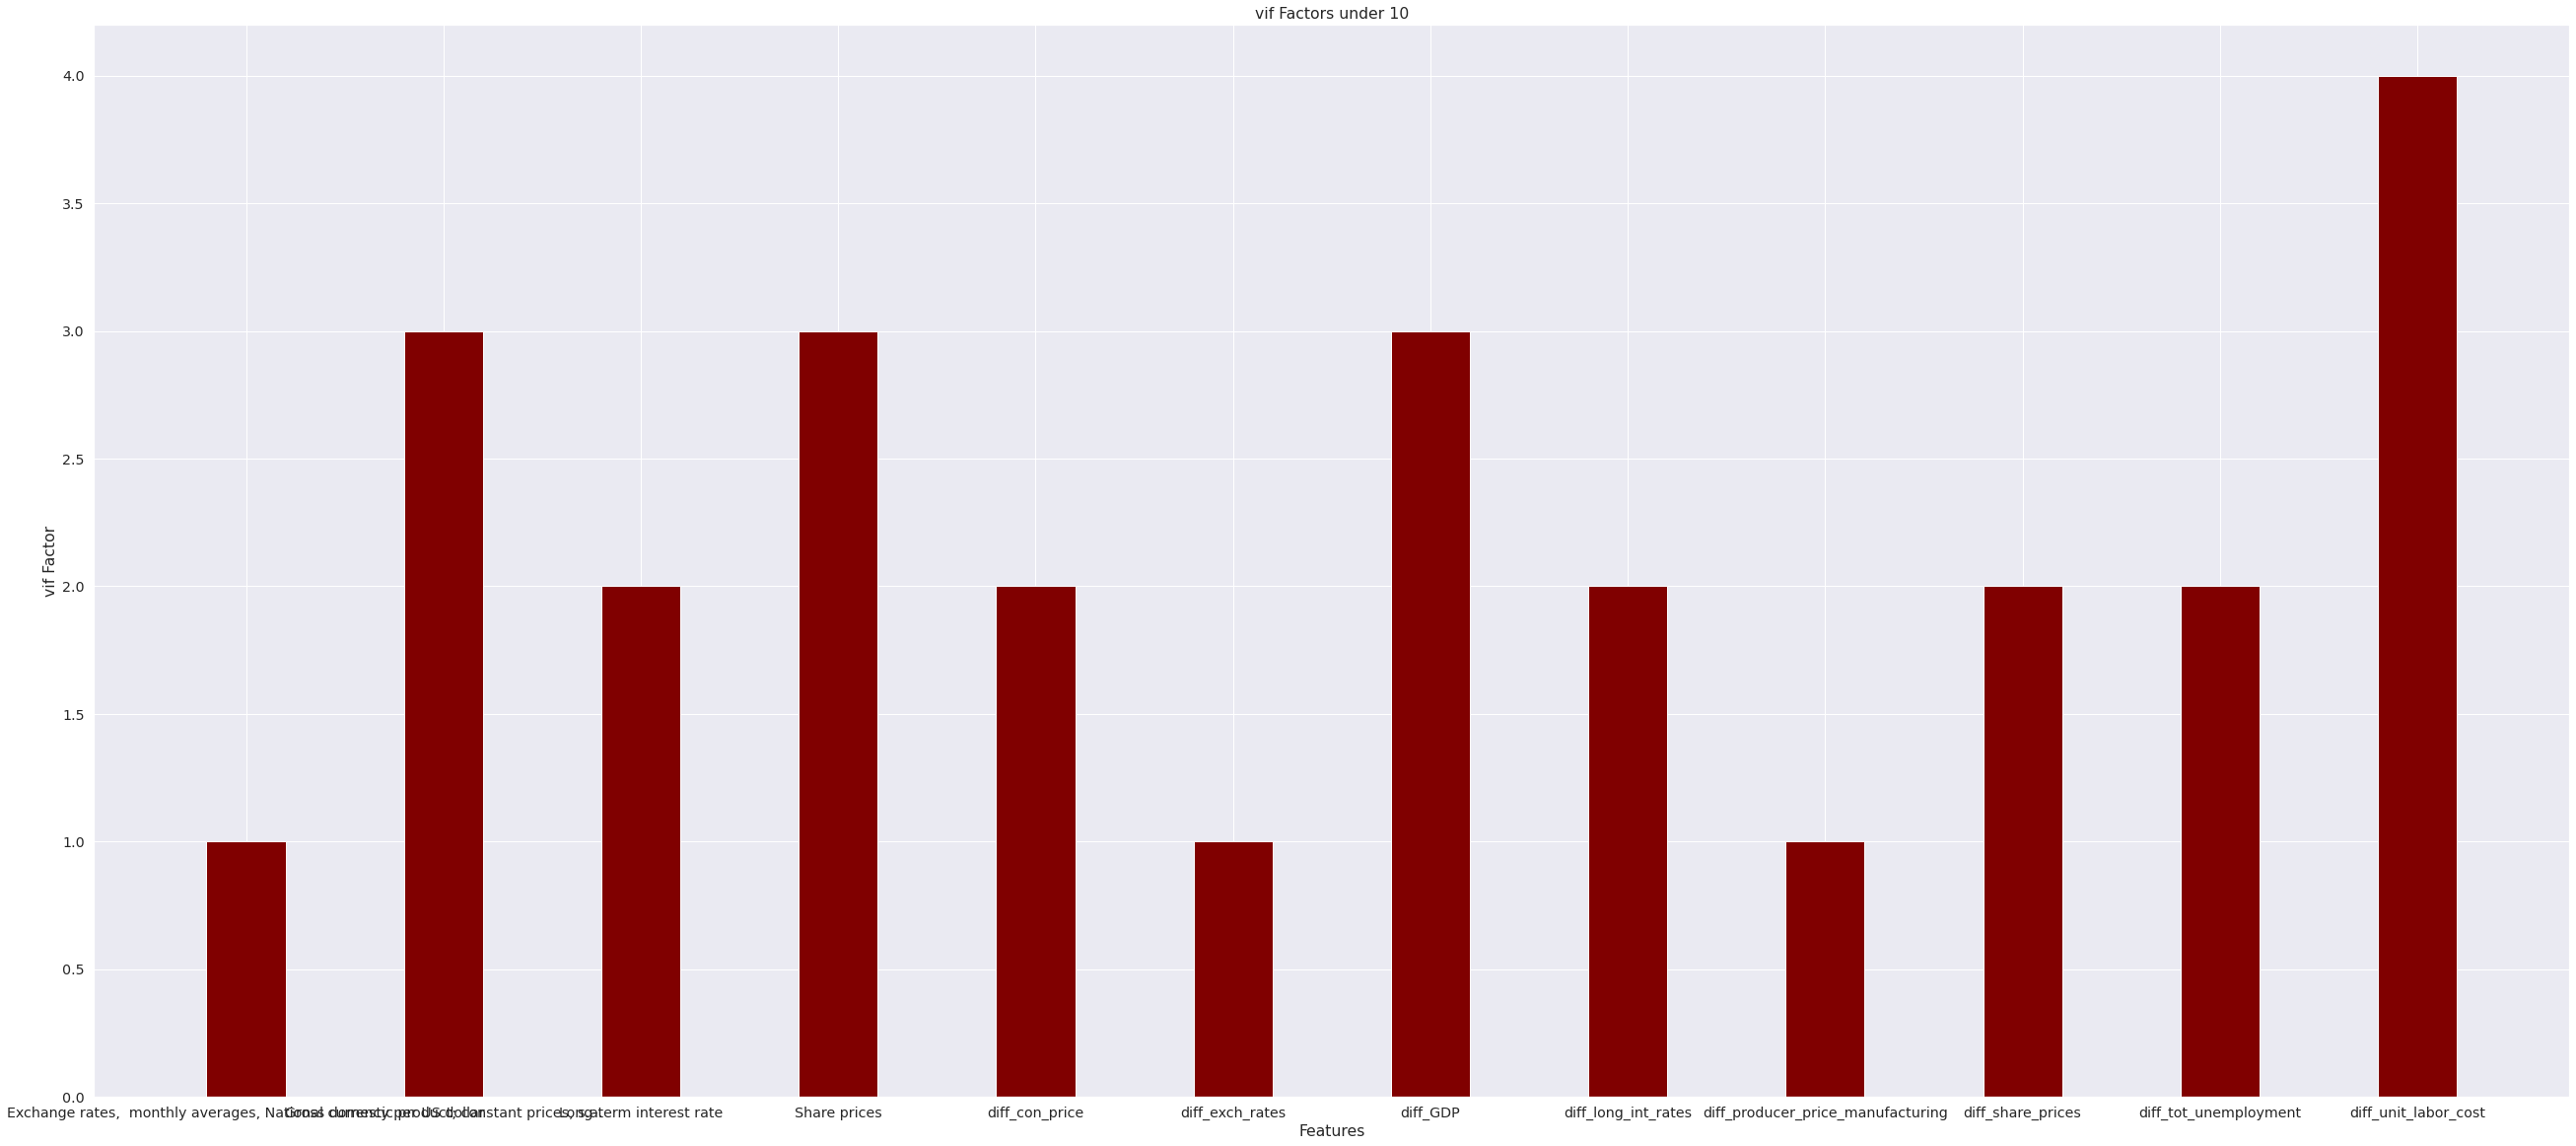

In [293]:
import numpy as np
vif_Factor1 = vif_indep_var4['vif_Factor'].astype(np.int64)

from matplotlib import pyplot

features = list(vif_indep_var4['features'])
#vif_Factor = list([dfjjj['vif_Factor']])

fig = plt.figure(figsize = (45, 20))


pyplot.bar(features,vif_Factor1, color='maroon', width = 0.4)
pyplot.xlabel("Features")
pyplot.ylabel('vif Factor')
pyplot.title("vif Factors under 10")
pyplot.show()

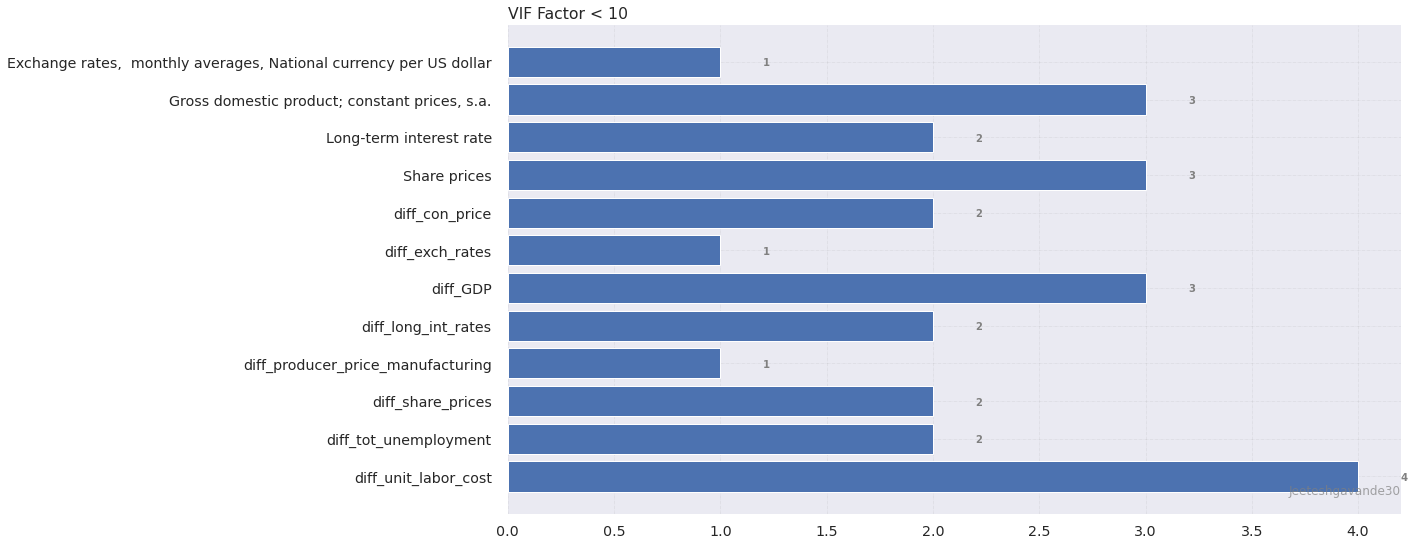

In [294]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(features, vif_Factor1)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
# Add Plot Title
ax.set_title('VIF Factor < 10',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [295]:
from sklearn.feature_selection import SelectFromModel
#will now use feature selection package to determine which have information above average
var_38 = vif4_list
#create model with 38 selected features and run once again 

#with a train and test dataset we select the features from the train set and then transfer changes to the test set later
x = dfxxxx[var_38]
y = dfxxxx[["binary"]]
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

#feature selection1 
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat2= X_train.columns[(sel.get_support())]
len(selected_feat2) 

4

In [296]:
print(selected_feat2)

Index(['Share prices', 'diff_share_prices', 'diff_tot_unemployment',
       'diff_unit_labor_cost'],
      dtype='object')


In [297]:
from sklearn.feature_selection import SelectFromModel
#will now use feature selection package to determine which have information above average
var_39 = ['Gross domestic product; constant prices, s.a.',
       'diff_producer_price_manufacturing', 'diff_share_prices',
       'diff_tot_unemployment', 'diff_unit_labor_cost']
#create model with 38 selected features and run once again 

#with a train and test dataset we select the features from the train set and then transfer changes to the test set later
x = dfxxxx[var_39]
y = dfxxxx[["binary"]]
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

#feature selection1 
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat3= X_train.columns[(sel.get_support())]
len(selected_feat3) 

2

In [298]:
print(selected_feat3)

Index(['diff_share_prices', 'diff_tot_unemployment'], dtype='object')


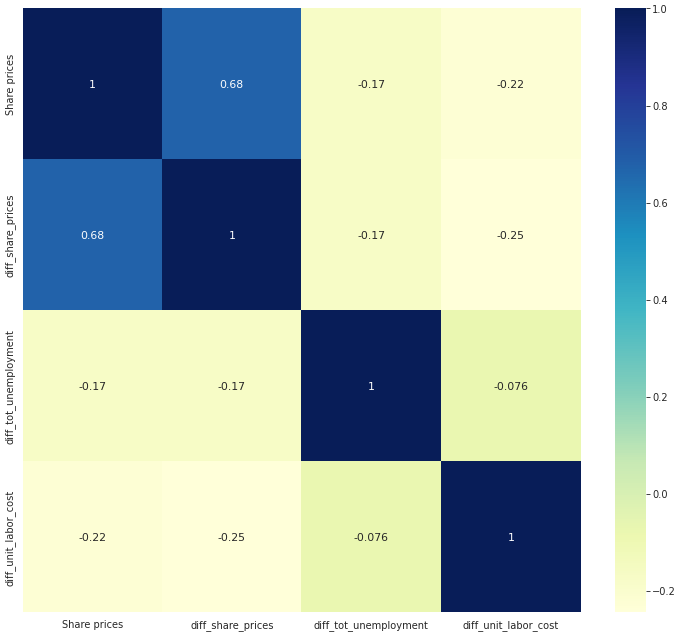

In [299]:
#now want to look with heat map to see if any of the 5 variables are highly correlated 
df_heatmap = dfxxxx[selected_feat2]
 
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

figure(figsize=(18, 16), dpi=50)

sns.heatmap(df_heatmap.corr(), annot=True, cmap="YlGnBu")
plt.show()
#will exclude share prices since its highly correlated with diff_share_prices 

###Optimized Diff Decision Tree

In [300]:
x = dfxxxx[['diff_share_prices', 'diff_tot_unemployment', 'diff_unit_labor_cost']]
y = dfxxxx[["binary"]]
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [301]:
#Decision Tree Model
model = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [302]:
#Evaluating Performance 
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(x_test)

print('train accuracy: ', accuracy_score(y_train, y_pred_train))
print('test accuracy: ', accuracy_score(y_test, y_pred_test))

train accuracy:  0.7448979591836735
test accuracy:  0.5714285714285714


In [303]:
#conducting cross validation and grid search on model to determine optimal parameters
param_dict={ "criterion":["gini","entropy"],
            "max_depth":range(1,10),
            "min_samples_split":range(1,10),
            "min_samples_leaf":range(1,5)}

grid=GridSearchCV(model,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [304]:
#grid.best_score_
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [305]:
#Run model with optimal parameters
#Decision Tree Model
 
model2 = tree.DecisionTreeClassifier(random_state=1, max_depth=8, criterion='gini',
                                    min_samples_leaf=3, min_samples_split=2)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=1)

In [306]:
#Evaluating Performance 
y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(x_test)

print('train accuracy: ', accuracy_score(y_train, y_pred_train2))
print('test accuracy: ', accuracy_score(y_test, y_pred_test2))

train accuracy:  0.8775510204081632
test accuracy:  0.5714285714285714


In [312]:
#Rerun model with optimal parameters
#Decision Tree Model
#decided to decrease to max_depth to 4 instead of suggested 8 due to overfitting 
model3 = tree.DecisionTreeClassifier(random_state=1, max_depth=4, criterion='gini',
                                    min_samples_leaf=3, min_samples_split=2)
model3.fit(X_train, y_train)
#Evaluating Performance 
y_pred_train3 = model3.predict(X_train)
y_pred_test3 = model3.predict(x_test)

print('train accuracy: ', accuracy_score(y_train, y_pred_train3))
print('test accuracy: ', accuracy_score(y_test, y_pred_test3))

train accuracy:  0.7755102040816326
test accuracy:  0.6190476190476191


In [313]:
#visualize tree
fn=['diff_share_prices', 'diff_tot_unemployment','diff_unit_labor_cost']
cn=['Positive', 'Negative']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,6), dpi=1200)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

###Random Forest

In [314]:
x = dfxxxx[['diff_share_prices', 'diff_tot_unemployment','diff_unit_labor_cost']]
y = dfxxxx[["binary"]]

X_train_for,x_test_for,y_train_for,y_test_for = train_test_split(x,y,test_size=0.3,random_state=1)

In [315]:
forest = RandomForestClassifier(criterion = 'gini', n_estimators=6,
                                random_state=1, n_jobs=3)
forest.fit(X_train_for, y_train_for)

y_pred_train_for = forest.predict(X_train_for)
y_pred_test_for = forest.predict(x_test_for)

print('train accuracy: ', accuracy_score(y_train_for, y_pred_train_for))
print('test accuracy: ', accuracy_score(y_test_for, y_pred_test_for))

train accuracy:  0.9183673469387755
test accuracy:  0.7380952380952381


In [348]:
#conducting cross validation and grid search on model to determine optimal parameters
param_dict={ "criterion":["gini","entropy"],
            "max_depth":range(1,10),
            "min_samples_split":range(1,10),
            "min_samples_leaf":range(1,5)}

grid=GridSearchCV(forest,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(X_train_for,y_train_for)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=6, n_jobs=3,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [349]:
grid.best_score_
#grid.best_params_

0.6433333333333333

In [318]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = clf.fit(X_train, x_test, y_train, y_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  7%|▋         | 2/29 [00:00<00:01, 19.81it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for BaggingClassifier
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for BernoulliNB
Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'
ROC AUC couldn't be calculated for CalibratedClassifierCV
could not convert string to float: 'Negative'
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
could not convert string to float: 'Positive'
ROC AUC couldn't be calculated for DummyClassifier
Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'
ROC AUC couldn't be calculated for ExtraTreeClassifier
could not convert string to float: 'Negative'


 62%|██████▏   | 18/29 [00:00<00:00, 50.75it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for GaussianNB
Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'
ROC AUC couldn't be calculated for KNeighborsClassifier
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for LabelPropagation
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for LabelSpreading
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'
ROC AUC couldn't be calculated for LinearSVC
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for LogisticRegression
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for NearestCentroid
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for NuSVC

100%|██████████| 29/29 [00:00<00:00, 44.36it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for RidgeClassifier
Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'
ROC AUC couldn't be calculated for RidgeClassifierCV
Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'
ROC AUC couldn't be calculated for SGDClassifier
Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'
ROC AUC couldn't be calculated for SVC
could not convert string to float: 'Negative'
StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'
ROC AUC couldn't be calculated for XGBClassifier
could not convert string to float: 'Negative'
ROC AUC couldn't be calculated for LGBMClassifier
could not convert string to float: 'Negative'


In [319]:
models[['Accuracy','F1 Score']]

Accuracy  F1 Score
Model                                            
QuadraticDiscriminantAnalysis      0.64      0.65
GaussianNB                         0.60      0.60
NuSVC                              0.62      0.63
KNeighborsClassifier               0.62      0.63
LGBMClassifier                     0.62      0.62
SVC                                0.60      0.61
SGDClassifier                      0.57      0.58
Perceptron                         0.52      0.53
RandomForestClassifier             0.57      0.58
XGBClassifier                      0.55      0.56
DecisionTreeClassifier             0.57      0.58
ExtraTreesClassifier               0.55      0.56
RidgeClassifierCV                  0.57      0.56
RidgeClassifier                    0.57      0.56
PassiveAggressiveClassifier        0.67      0.53
AdaBoostClassifier                 0.50      0.51
NearestCentroid                    0.48      0.49
LinearDiscriminantAnalysis         0.57      0.56
DummyClassifier                    0.67      0.53
CalibratedClassifierCV             0.57      0.56
BernoulliNB                        0.55      0.55
LogisticRegression                 0.55      0.54
LinearSVC                          0.55      0.54
LabelSpreading                     0.48      0.49
BaggingClassifier                  0.43      0.44
LabelPropagation                   0.45      0.47
ExtraTreeClassifier                0.45      0.47

##Model Evaluation OECD 

In [320]:
#running on decision tree 
from sklearn import metrics
y_pred2=model2.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred2))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

0.5714285714285714
              precision    recall  f1-score   support

    Negative       0.73      0.57      0.64        28
    Positive       0.40      0.57      0.47        14

    accuracy                           0.57        42
   macro avg       0.56      0.57      0.56        42
weighted avg       0.62      0.57      0.58        42



In [321]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

[[16 12]
 [ 6  8]]


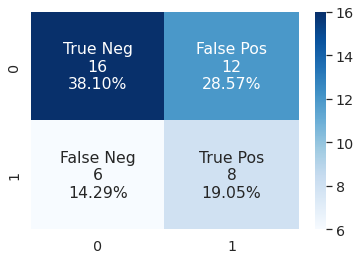

In [322]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [323]:
#now running random forest metrics 

In [324]:
y_pred_for=forest.predict(x_test_for)
print(metrics.accuracy_score(y_test_for,y_pred_for))
from sklearn.metrics import classification_report
print(classification_report(y_test_for, y_pred_for))

0.7380952380952381
              precision    recall  f1-score   support

    Negative       0.76      0.89      0.82        28
    Positive       0.67      0.43      0.52        14

    accuracy                           0.74        42
   macro avg       0.71      0.66      0.67        42
weighted avg       0.73      0.74      0.72        42



In [325]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test_for, y_pred_for)
print(confusion_matrix2)

[[25  3]
 [ 8  6]]


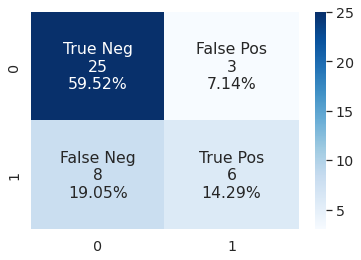

In [326]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix2.flatten()/np.sum(confusion_matrix2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix2, annot=labels, fmt='', cmap='Blues')

#OECD Hypothesis Test

In [340]:
x.shape

(140, 3)

In [341]:
#create random model 

#create random yes/no data 
y_random = []
for i in range(0,140):
  binary_choice = choice(['Positive', 'Negative'])
  y_random.append(binary_choice)

y_random = pd.DataFrame(y_random)

In [342]:
y_random.head()

0
0  Positive
1  Negative
2  Negative
3  Positive
4  Negative

In [343]:
kf = KFold(n_splits=10)
 
acc_score = []
acc_score_random = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index,:] , y.iloc[test_index,:]
    y_random_test = y_random.iloc[test_index,:]
    
    model2.fit(X_train,y_train)
    pred_values22 = model2.predict(X_test)
     
    acc = accuracy_score(pred_values22 , y_test)
    acc_random = accuracy_score(y_random_test, y_test)
    acc_score.append(acc)
    acc_score_random.append(acc_random)

In [344]:
acc_score

[0.14285714285714285,
 0.5,
 0.7142857142857143,
 0.6428571428571429,
 0.5,
 0.6428571428571429,
 0.5714285714285714,
 0.2857142857142857,
 0.7142857142857143,
 0.5]

In [345]:
acc_score_random

[0.35714285714285715,
 0.7142857142857143,
 0.7142857142857143,
 0.42857142857142855,
 0.7142857142857143,
 0.5714285714285714,
 0.5,
 0.14285714285714285,
 0.5714285714285714,
 0.5]

In [346]:
stat, p = ttest_ind(acc_score, acc_score_random)
print('t-statistic = ', stat, 'p-value = ', p)

print('DT accuracy score mean: ', np.mean(acc_score))
print('Random model accuracy score mean: ', np.mean(acc_score_random))

t-statistic =  1.3562844481314228e-15 p-value =  0.9999999999999989
DT accuracy score mean:  0.5214285714285715
Random model accuracy score mean:  0.5214285714285714


In [347]:
print('null hyp: The decision tree model with differenced share prices, differenced total unemployment rates, and differenced unit labor costs as inputs \n  is not better than a random chance model at predicting if \n the differenced gini income value increased or decreased.')
print('alt hyp: The decision tree model with differenced share prices, differenced total unemployment rates, and differenced unit labor costs as inputs \n  is better than a random chance model at predicting if \n the differenced gini income value increased or decreased.')

if p > 0.05:
  print('We fail to reject the null hypothesis')
else:
  print('We reject the null hypothesis')

null hyp: The decision tree model with differenced share prices, differenced total unemployment rates, and differenced unit labor costs as inputs 
  is not better than a random chance model at predicting if 
 the differenced gini income value increased or decreased.
alt hyp: The decision tree model with differenced share prices, differenced total unemployment rates, and differenced unit labor costs as inputs 
  is better than a random chance model at predicting if 
 the differenced gini income value increased or decreased.
We fail to reject the null hypothesis
